In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import neighbors
from sklearn.linear_model import LassoCV,RidgeCV
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import TheilSenRegressor
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib._color_data as mcd
from sklearn.ensemble import IsolationForest
from matplotlib.pyplot import plot, xlabel, ylabel
from sklearn.decomposition import PCA
import seaborn as sns
from warnings import filterwarnings
filterwarnings("ignore")
import sweetviz
from sklearn import preprocessing 
import lightgbm as lgb

In [2]:
df=pd.read_csv("audi_cleaned.csv")

In [3]:
df.head()

model   milage    fuel  power       gear       type door_numbers  \
0    Q7  248.000  Diesel    232  Automatic        suv          4/5   
1    A2   14.064  Benzin     75     Manuel  small car          4/5   
2    Q5   65.000  Diesel    190  Automatic  Limousine          4/5   
3    Q5  105.000  Diesel    239  Automatic        suv          4/5   
4    A8  199.892  Benzin    310  Automatic  Limousine          4/5   

   env_sticker emis_class ex_color   in_material    condition    price  \
0            4      Euro4    black  full-leather      damaged   6000.0   
1            4      Euro4    black        fabric  non-damaged  22999.0   
2            4      Euro6     grey  part-leather  non-damaged  26800.0   
3            4      Euro5     grey     Alcantara  non-damaged  24700.0   
4            4      Euro3    black  full-leather  non-damaged  12500.0   

   location  reg_month  reg_year  inspection_month  inspection_year  
0   66126.0          9      2007                 5             2021  
1   45711.0          3      2005                 9             2022  
2   91804.0          4      2016                 5             2021  
3   91790.0         10      2012                 2             2022  
4   61231.0         10      2001                10             2022

                                             |                                             | [  0%]   00:00 ->…


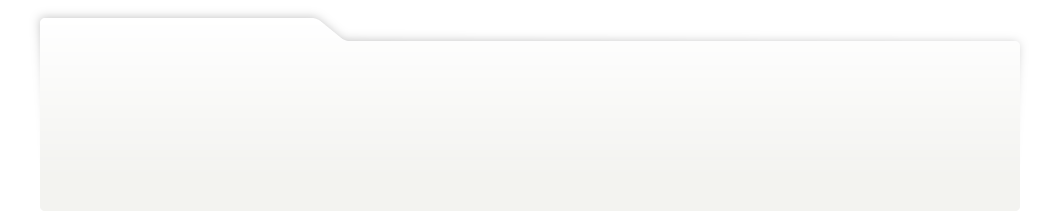
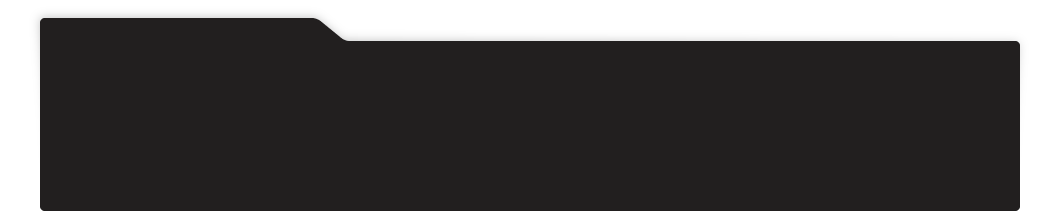
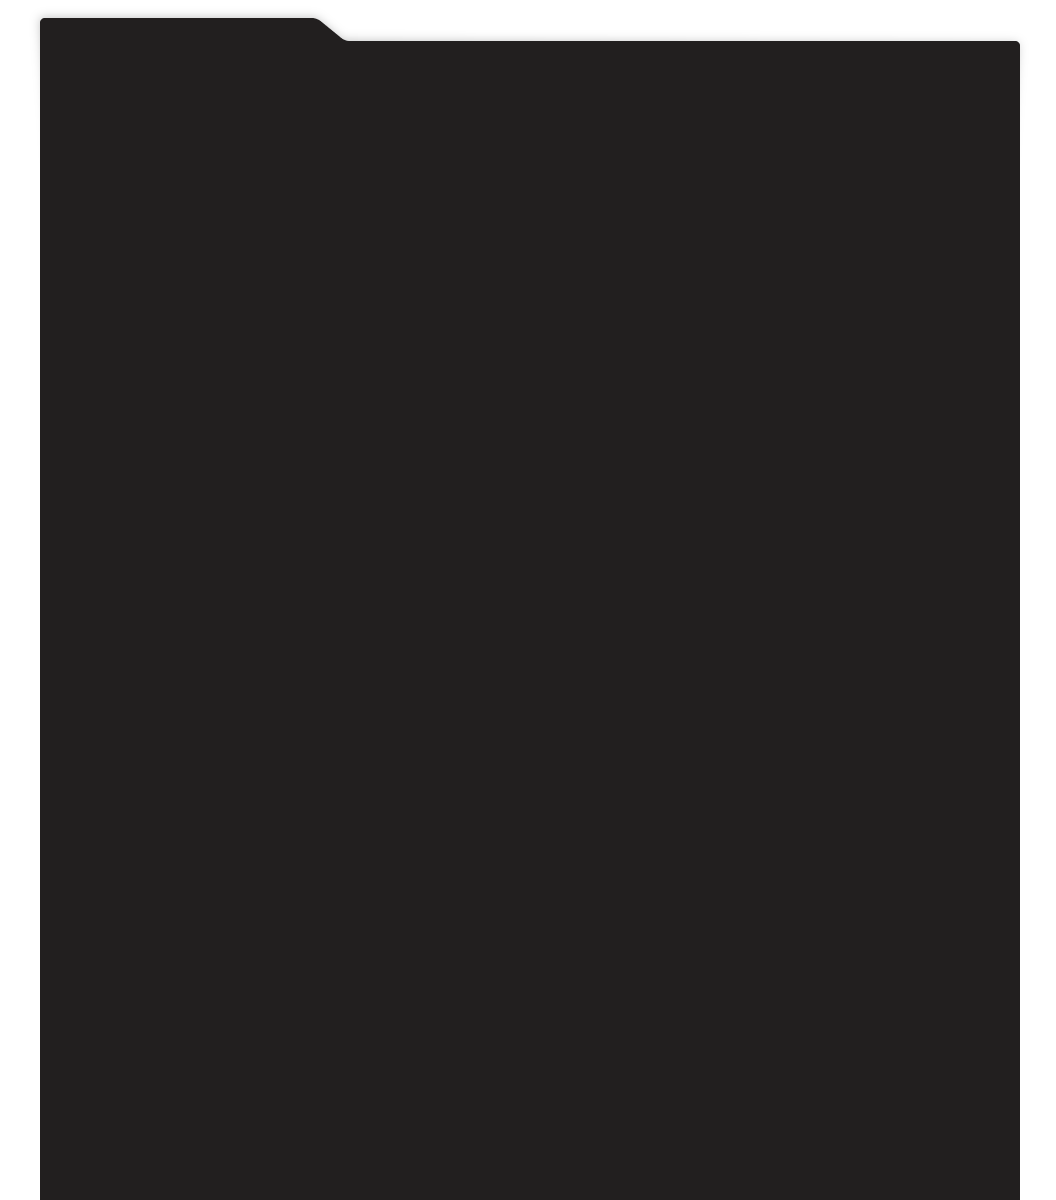
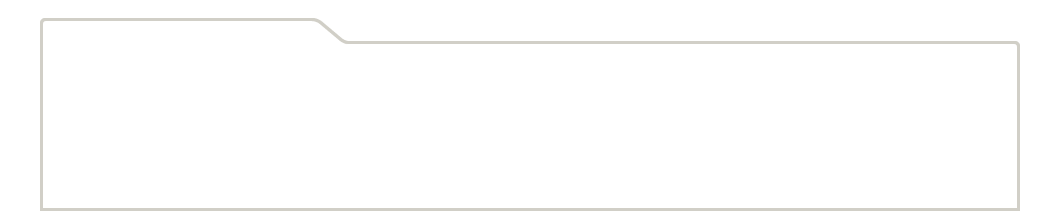
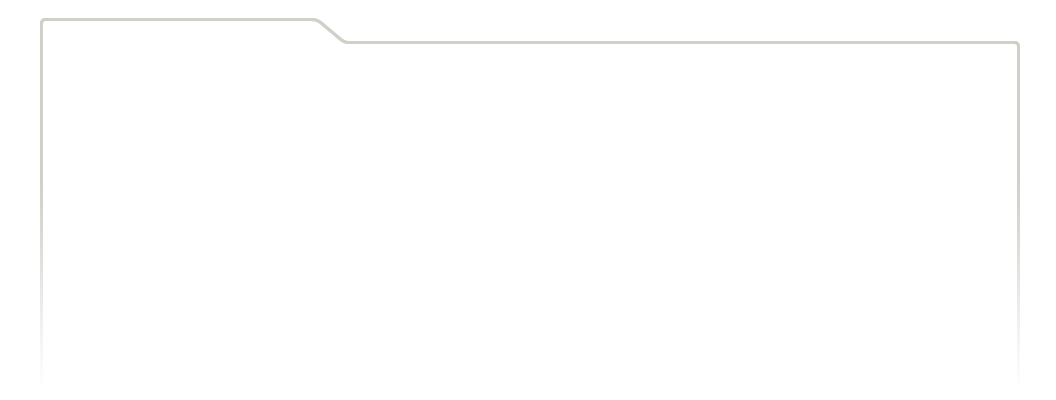
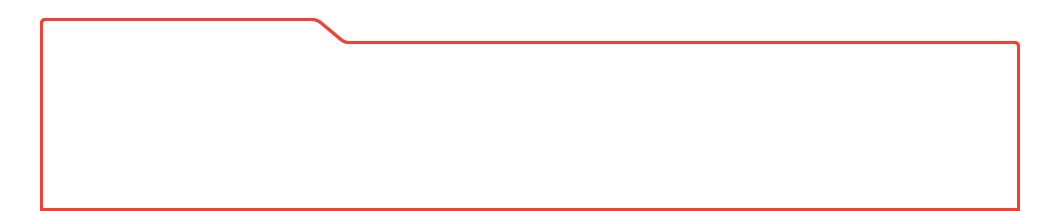
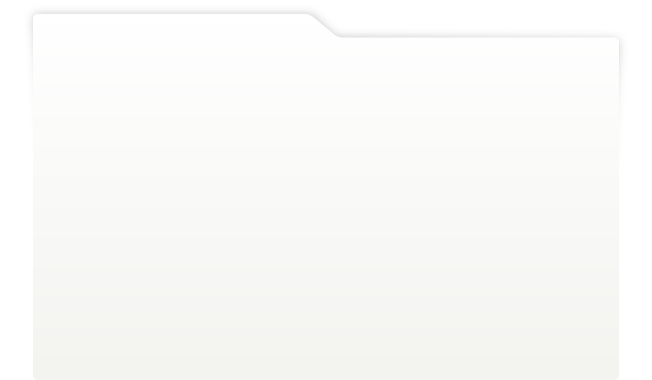
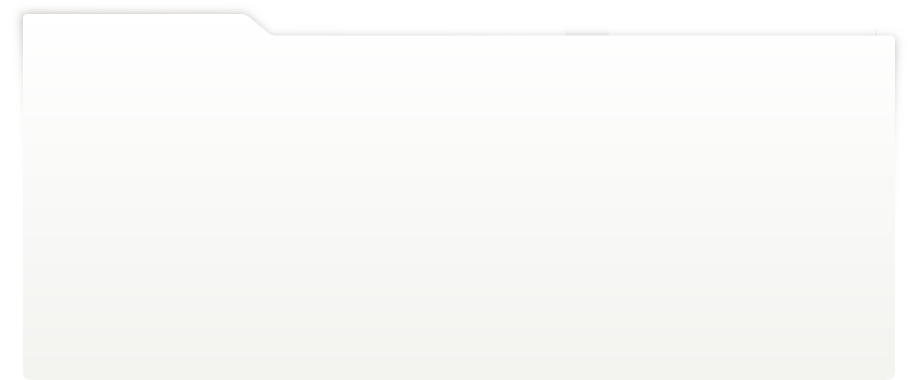
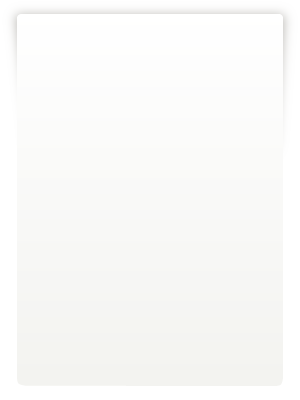
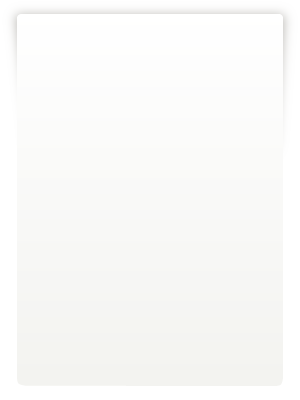
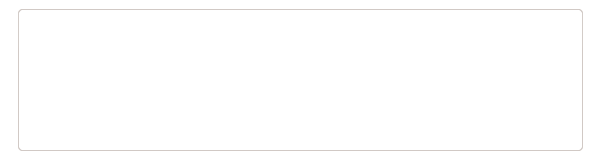
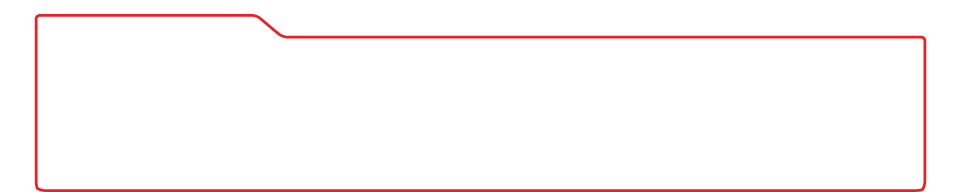
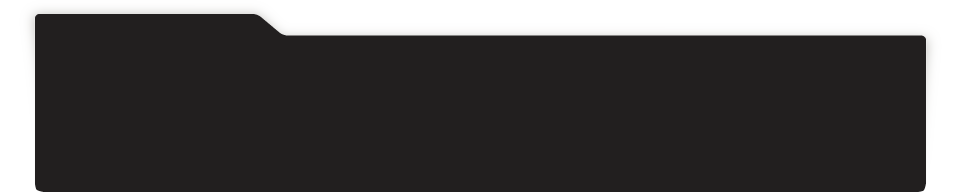
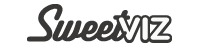
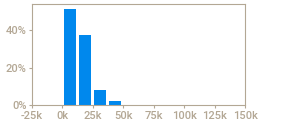
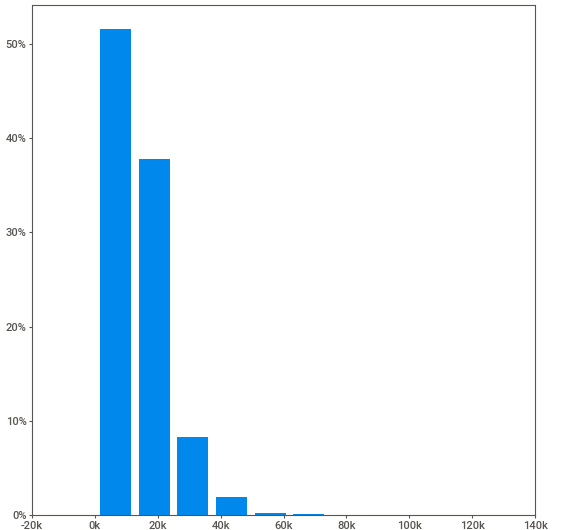
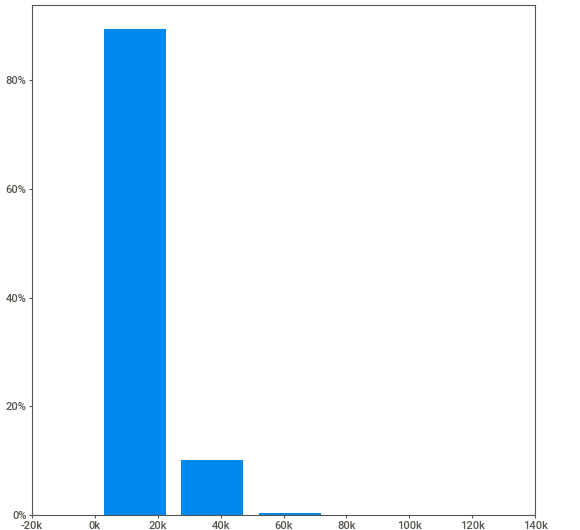
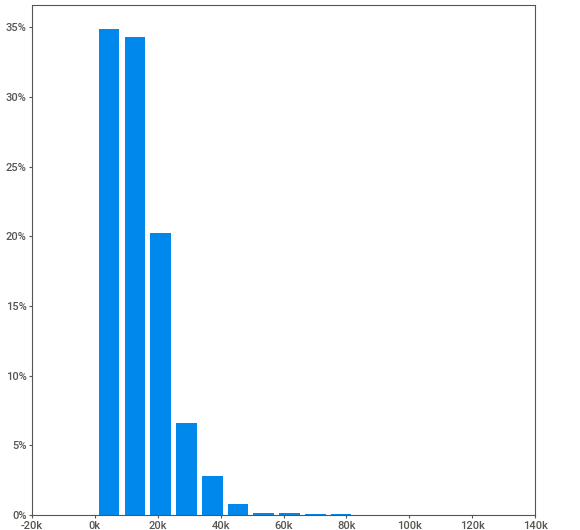
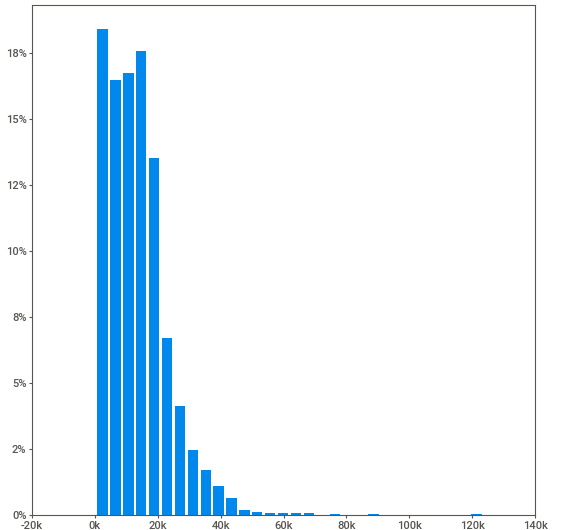
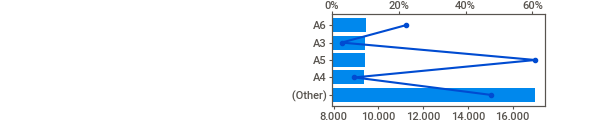
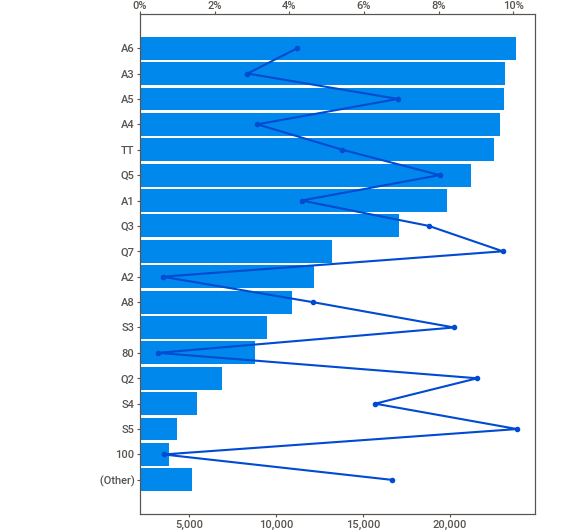
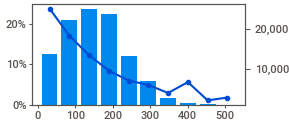
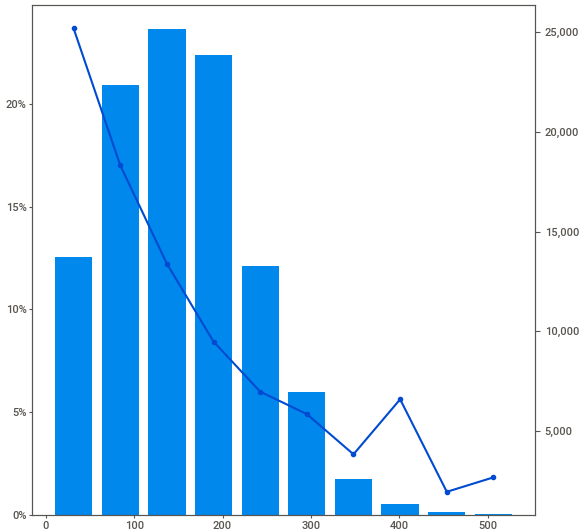
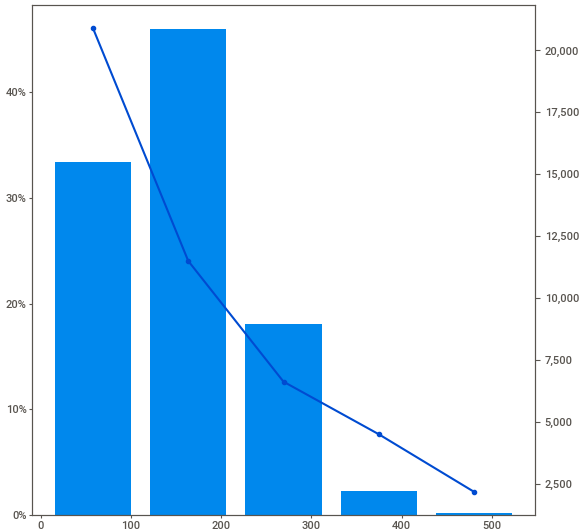
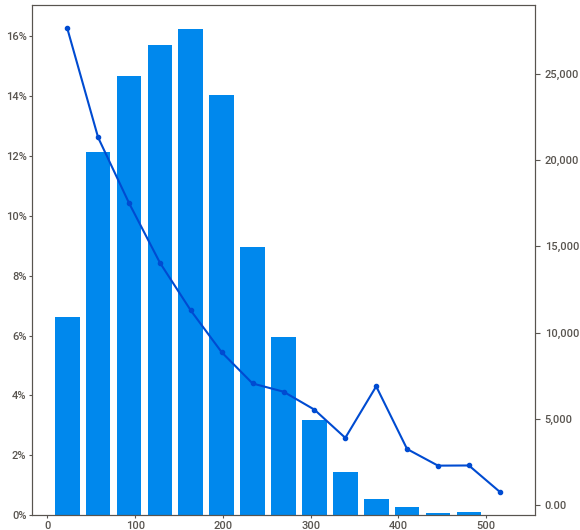
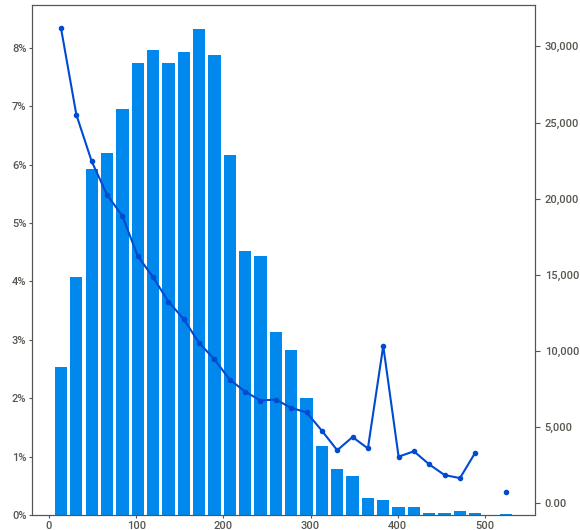
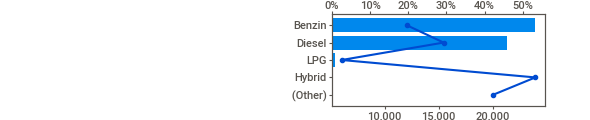
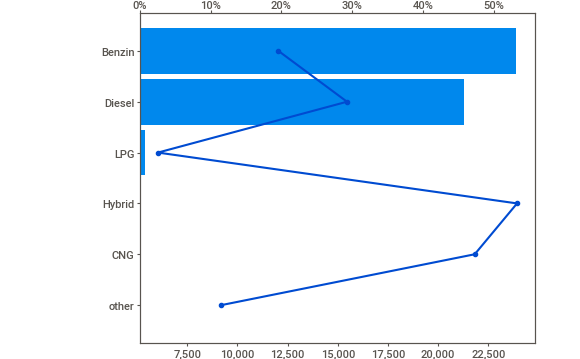
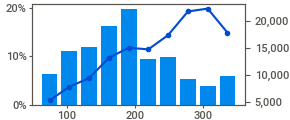
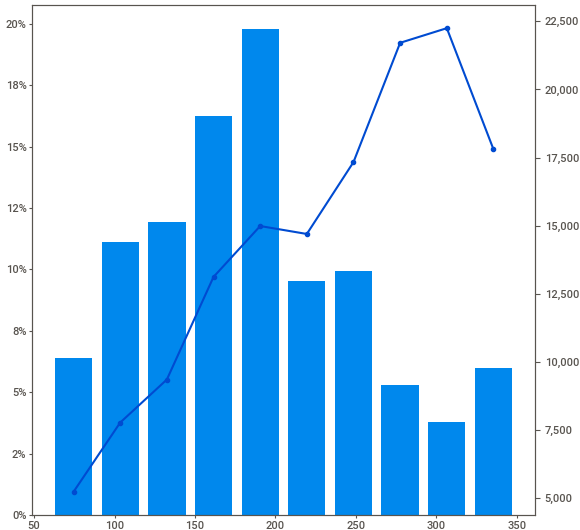
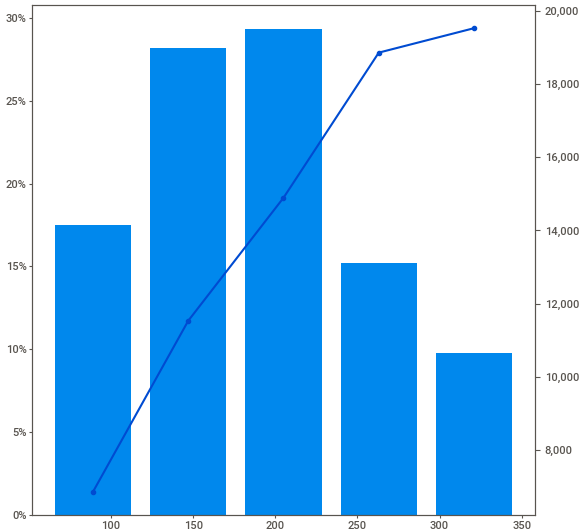
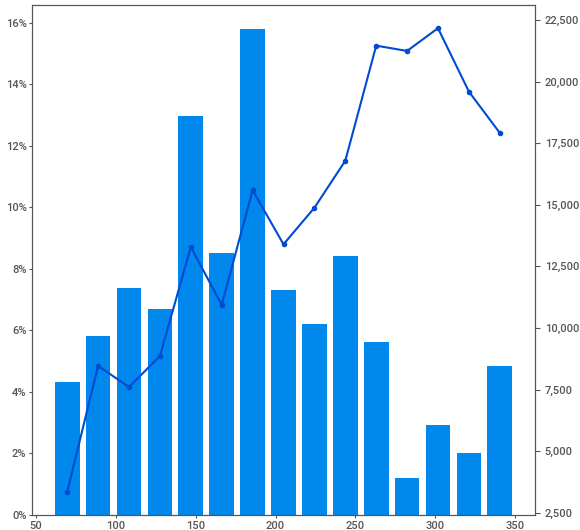
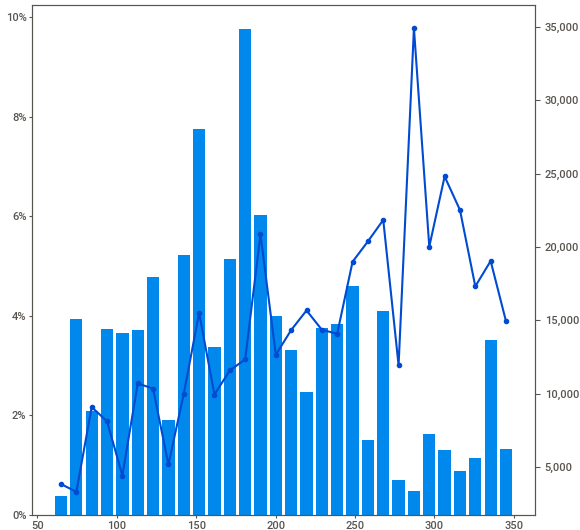
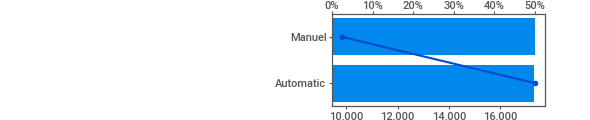
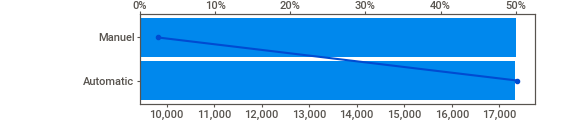
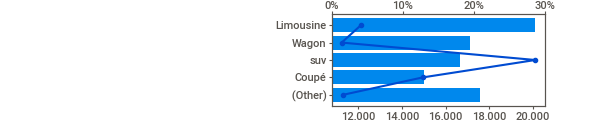
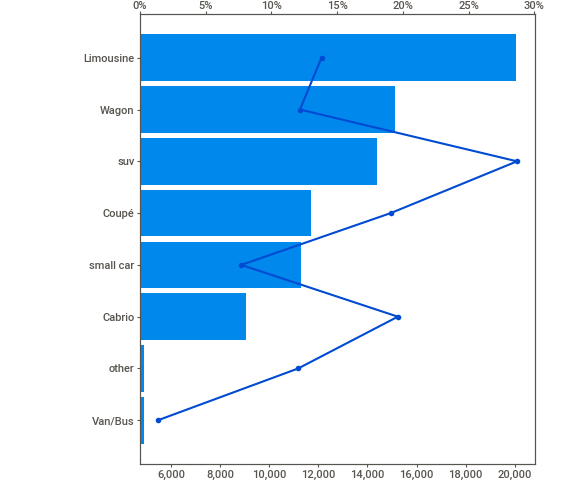
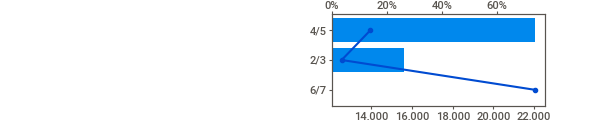
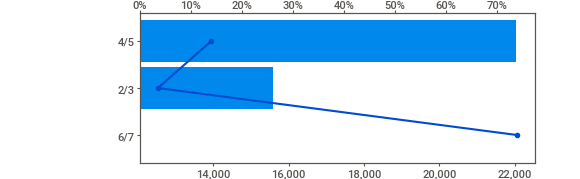
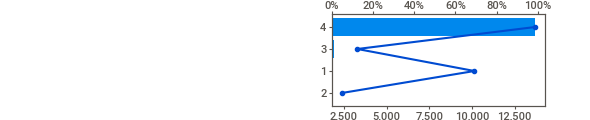
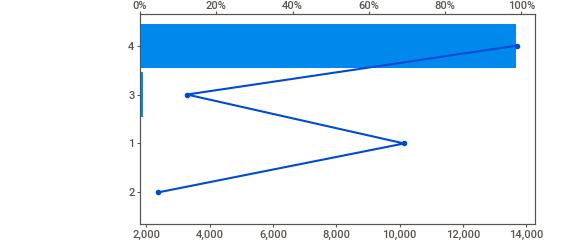
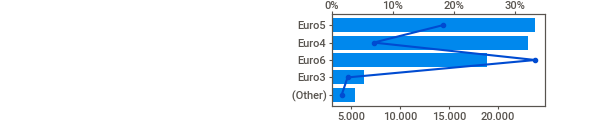
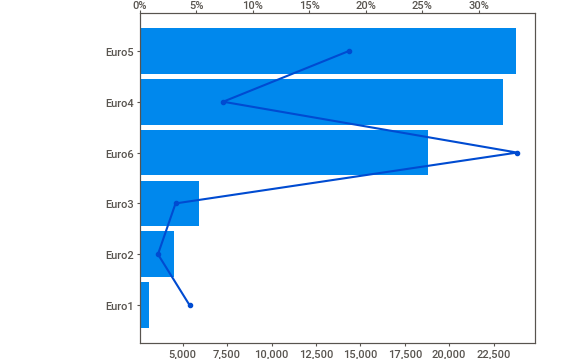
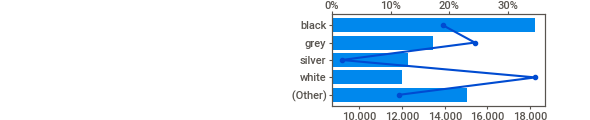
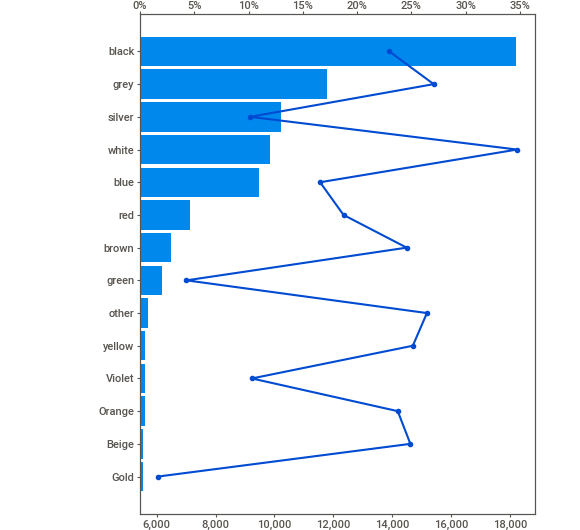
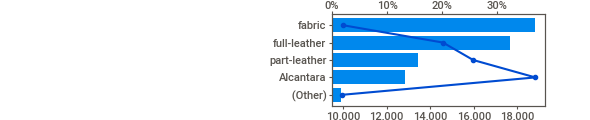
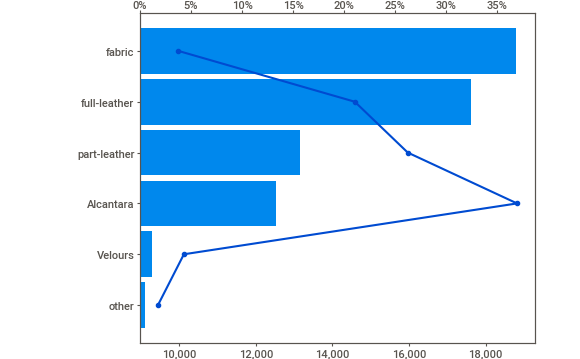
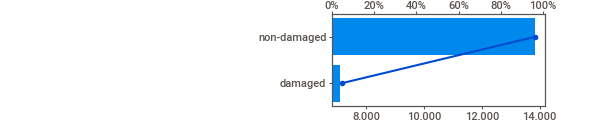
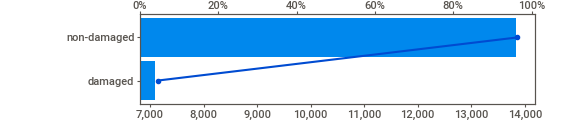
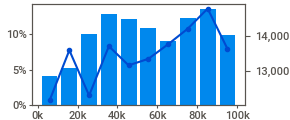
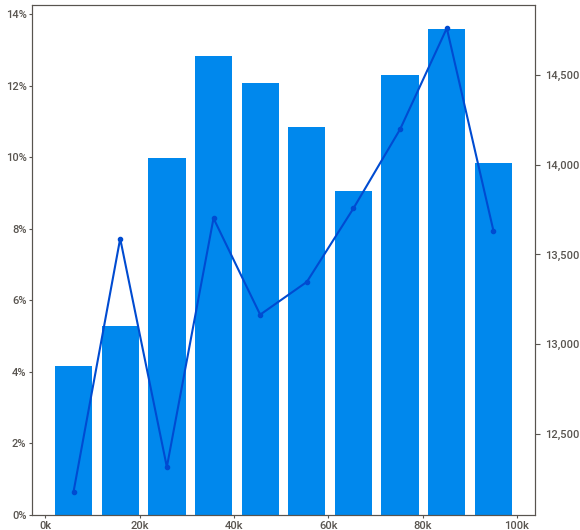
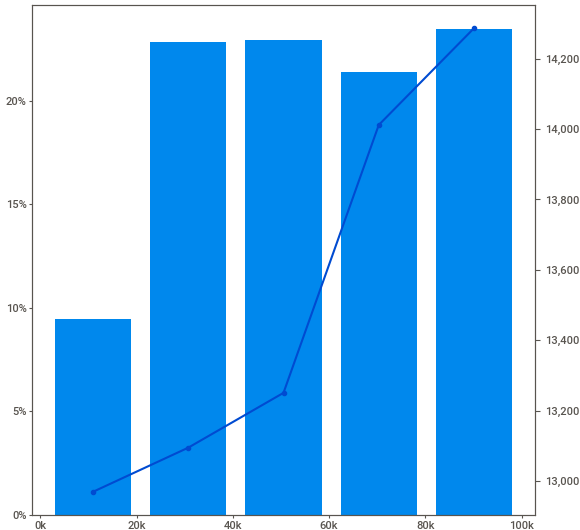
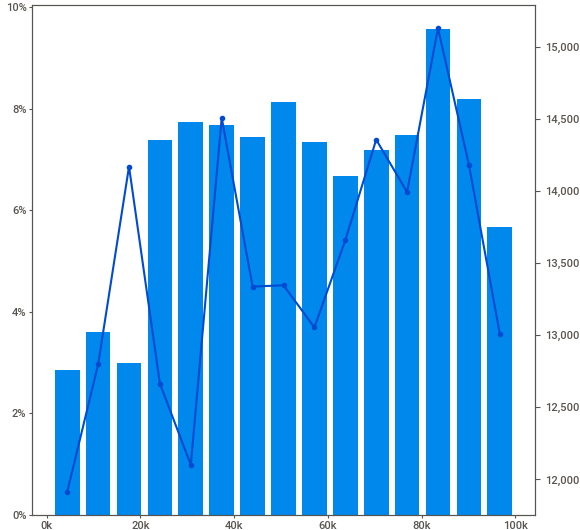
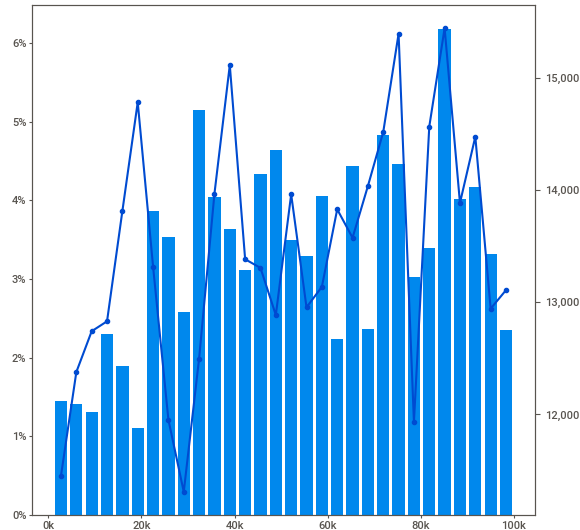
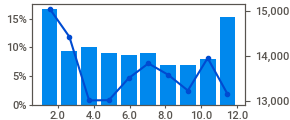
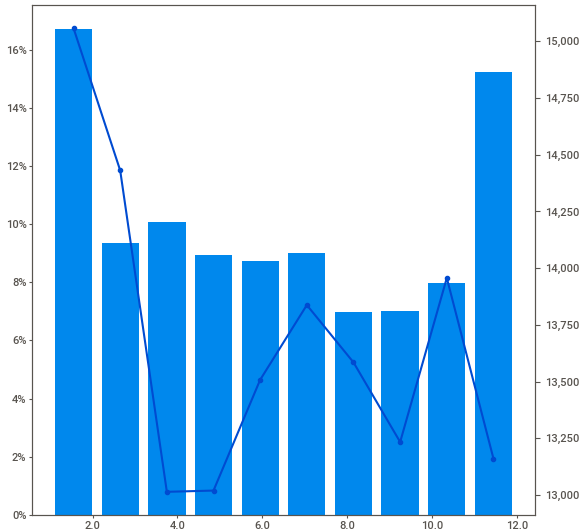
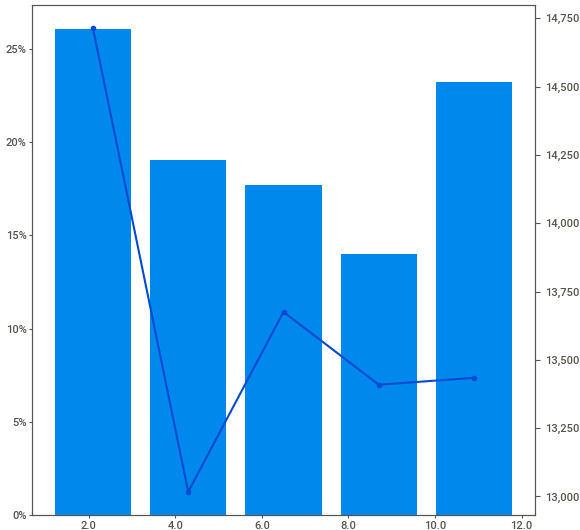
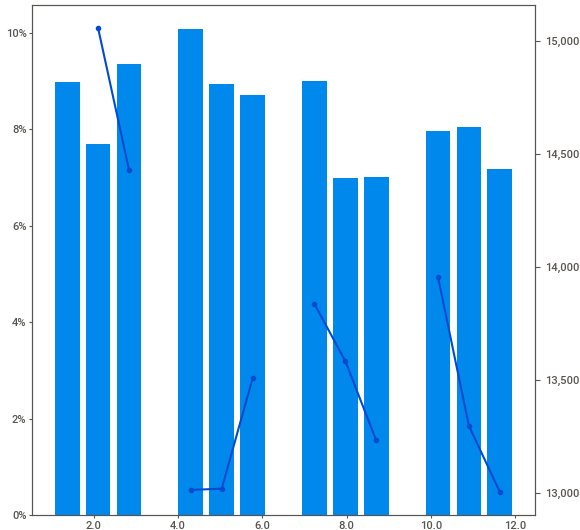
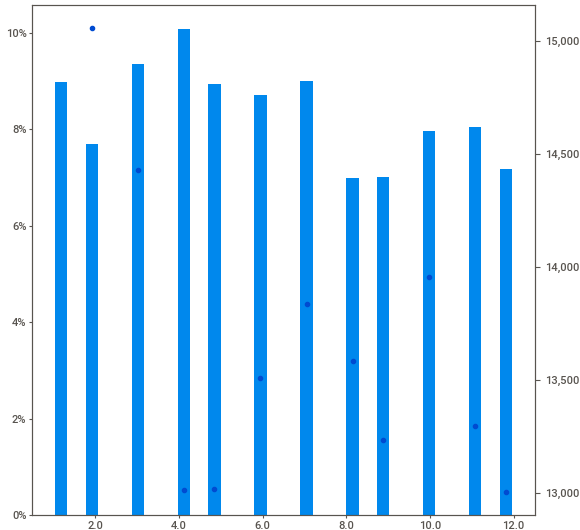
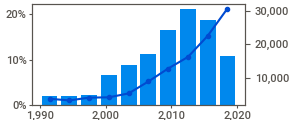
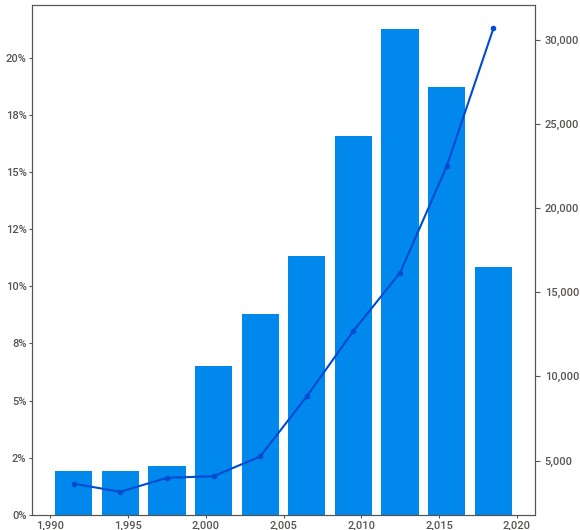
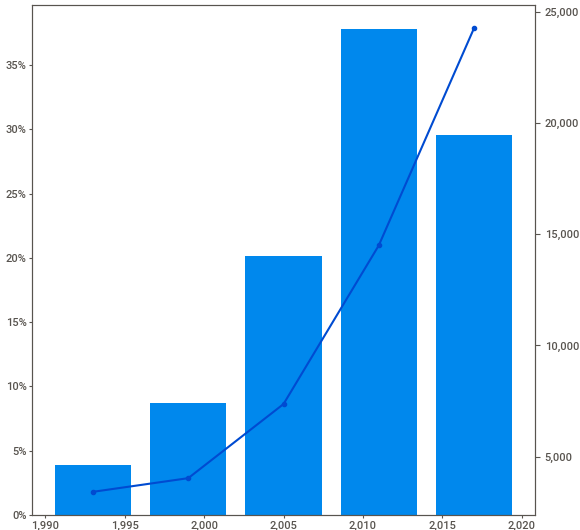
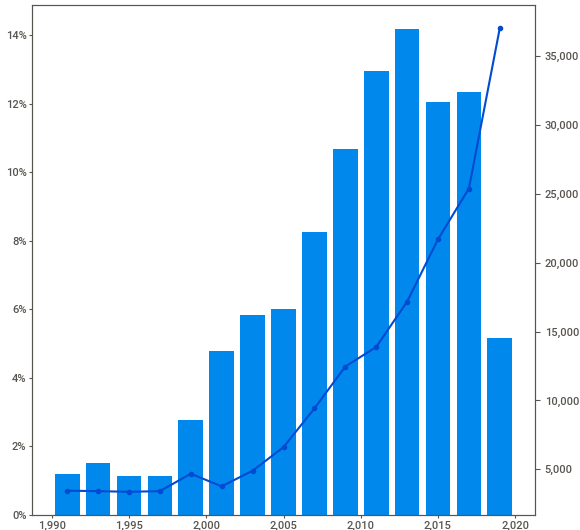
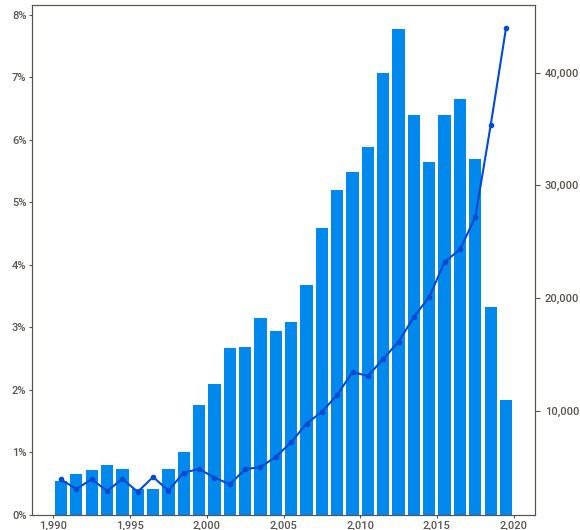
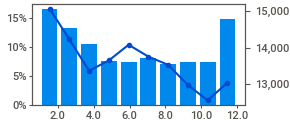
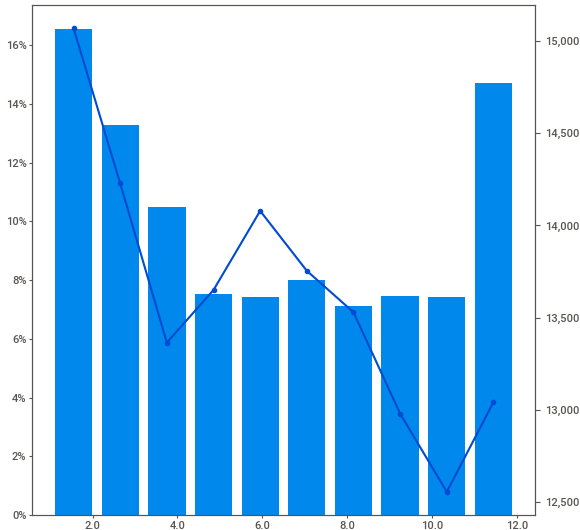
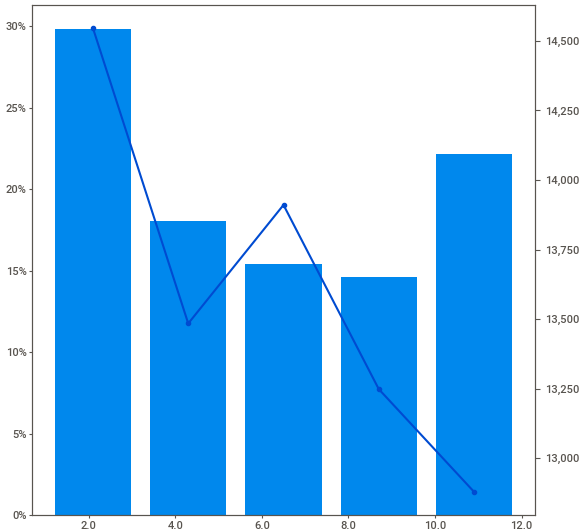
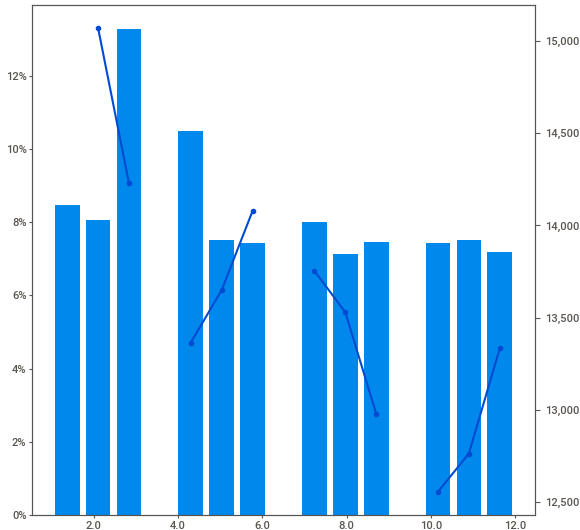
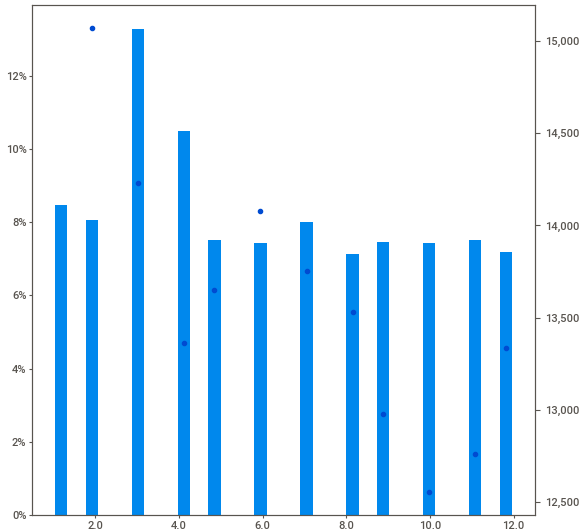
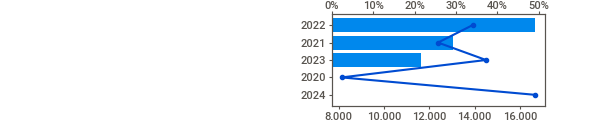
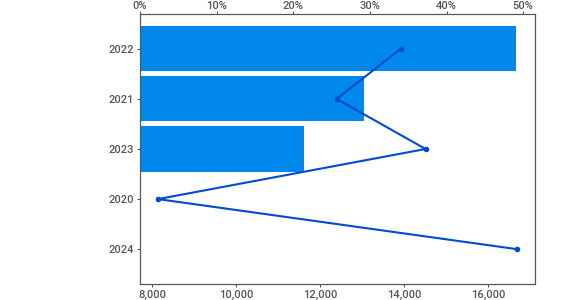
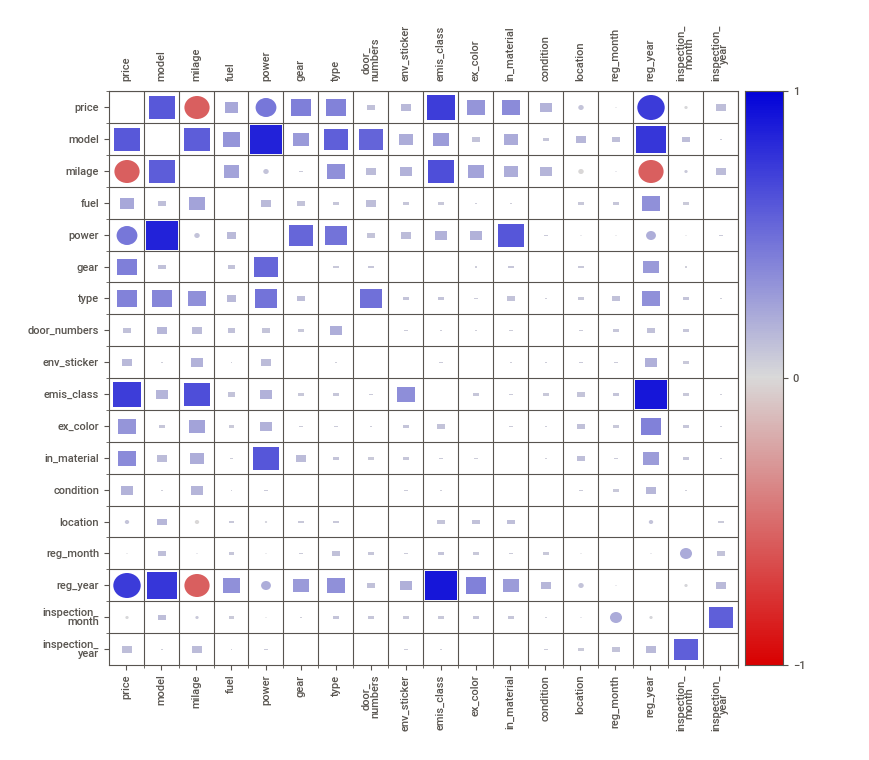
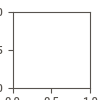

In [3]:
report = sweetviz.analyze(df, "price")
report.show_notebook()

In [3]:
#there are still duplicates
df=df.drop_duplicates()

In [4]:
#label encoding
cat_col = [col for col in df.columns if df[col].dtype=="O"]
le = preprocessing.LabelEncoder()
df[cat_col] = df[cat_col].apply(le.fit_transform)
df

model   milage  fuel  power  gear  type  door_numbers  env_sticker  \
0        14  248.000     2    232     0     7             1            4   
1         5   14.064     0     75     1     6             1            4   
2        13   65.000     2    190     0     2             1            4   
3        13  105.000     2    239     0     7             1            4   
4        10  199.892     0    310     0     2             1            4   
...     ...      ...   ...    ...   ...   ...           ...          ...   
7039     21  199.000     0    340     0     4             1            4   
7040     24  172.000     0    210     1     1             0            4   
7041     12  128.500     2    177     0     7             1            4   
7042     12  130.000     2    177     0     2             1            4   
7043      2  245.000     0    119     1     4             1            4   

      emis_class  ex_color  in_material  condition    price  location  \
0              3         4            3          0   6000.0   66126.0   
1              3         4            2          1  22999.0   45711.0   
2              5         8            5          1  26800.0   91804.0   
3              4         8            0          1  24700.0   91790.0   
4              2         4            3          1  12500.0   61231.0   
...          ...       ...          ...        ...      ...       ...   
7039           2         4            0          1   7500.0   67433.0   
7040           3         7            3          1   5900.0   76437.0   
7041           4        12            2          1  15000.0   66787.0   
7042           4         4            0          1  17700.0   59755.0   
7043           3         4            3          1   5100.0   23758.0   

      reg_month  reg_year  inspection_month  inspection_year  
0             9      2007                 5             2021  
1             3      2005                 9             2022  
2             4      2016                 5             2021  
3            10      2012                 2             2022  
4            10      2001                10             2022  
...         ...       ...               ...              ...  
7039          9      2002                 6             2021  
7040          9      1999                12             2022  
7041          3      2012                 3             2023  
7042          1      2014                 1             2023  
7043          1      1994                 1             2021  

[7029 rows x 18 columns]

In [5]:
#scaling
scaler = StandardScaler()
df.loc[:]=scaler.fit_transform(df)
df.head()

model    milage      fuel     power      gear      type  door_numbers  \
0  0.573213  1.194681  1.019460  0.654503 -1.001281  1.494300      0.589586   
1 -0.931247 -1.725738 -0.924858 -1.610227  0.998720  1.067122      0.589586   
2  0.406050 -1.089862  1.019460  0.048652 -1.001281 -0.641586      0.589586   
3  0.406050 -0.590508  1.019460  0.755479 -1.001281  1.494300      0.589586   
4 -0.095436  0.594108 -0.924858  1.779656 -1.001281 -0.641586      0.589586   

   env_sticker  emis_class  ex_color  in_material  condition     price  \
0     0.102776   -0.670825 -0.992270     0.333706  -4.937150 -0.780769   
1     0.102776   -0.670825 -0.992270    -0.368996   0.202546  0.968297   
2     0.102776    1.232395  0.281991     1.739108   0.202546  1.359390   
3     0.102776    0.280785  0.281991    -1.774398   0.202546  1.143317   
4     0.102776   -1.622434 -0.992270     0.333706   0.202546 -0.111969   

   location  reg_month  reg_year  inspection_month  inspection_year  
0  0.403140   0.802366 -0.377198         -0.326477        -1.293561  
1 -0.382641  -0.956965 -0.692757          0.838843         0.109593  
2  1.391494  -0.663743  1.042817         -0.326477        -1.293561  
3  1.390956   1.095587  0.411699         -1.200467         0.109593  
4  0.214729   1.095587 -1.323875          1.130173         0.109593

In [6]:
X = df.loc[:, df.columns != 'price']
y=df['price']

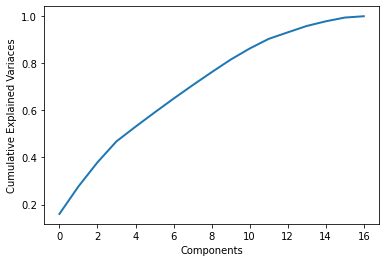

In [7]:
#so, almost every feature is important, even though some of them not correlated with target 
pca = PCA().fit(X)
plot(np.cumsum(pca.explained_variance_ratio_), linewidth=2)
xlabel('Components')
ylabel('Cumulative Explained Variaces')
plt.show()

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=350)

In [9]:
#for comparing
trainset=pd.concat([X_train, y_train], axis=1)
testset=pd.concat([X_test, y_test], axis=1)

                                             |                                             | [  0%]   00:00 ->…


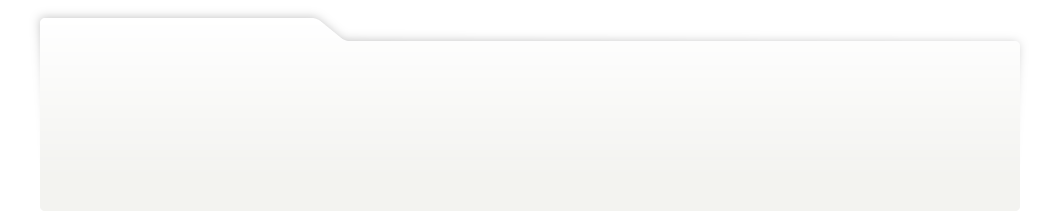
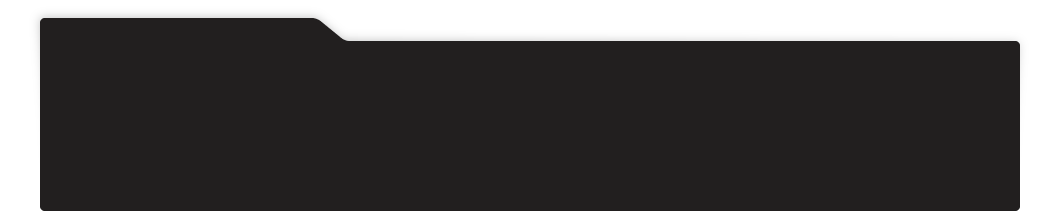
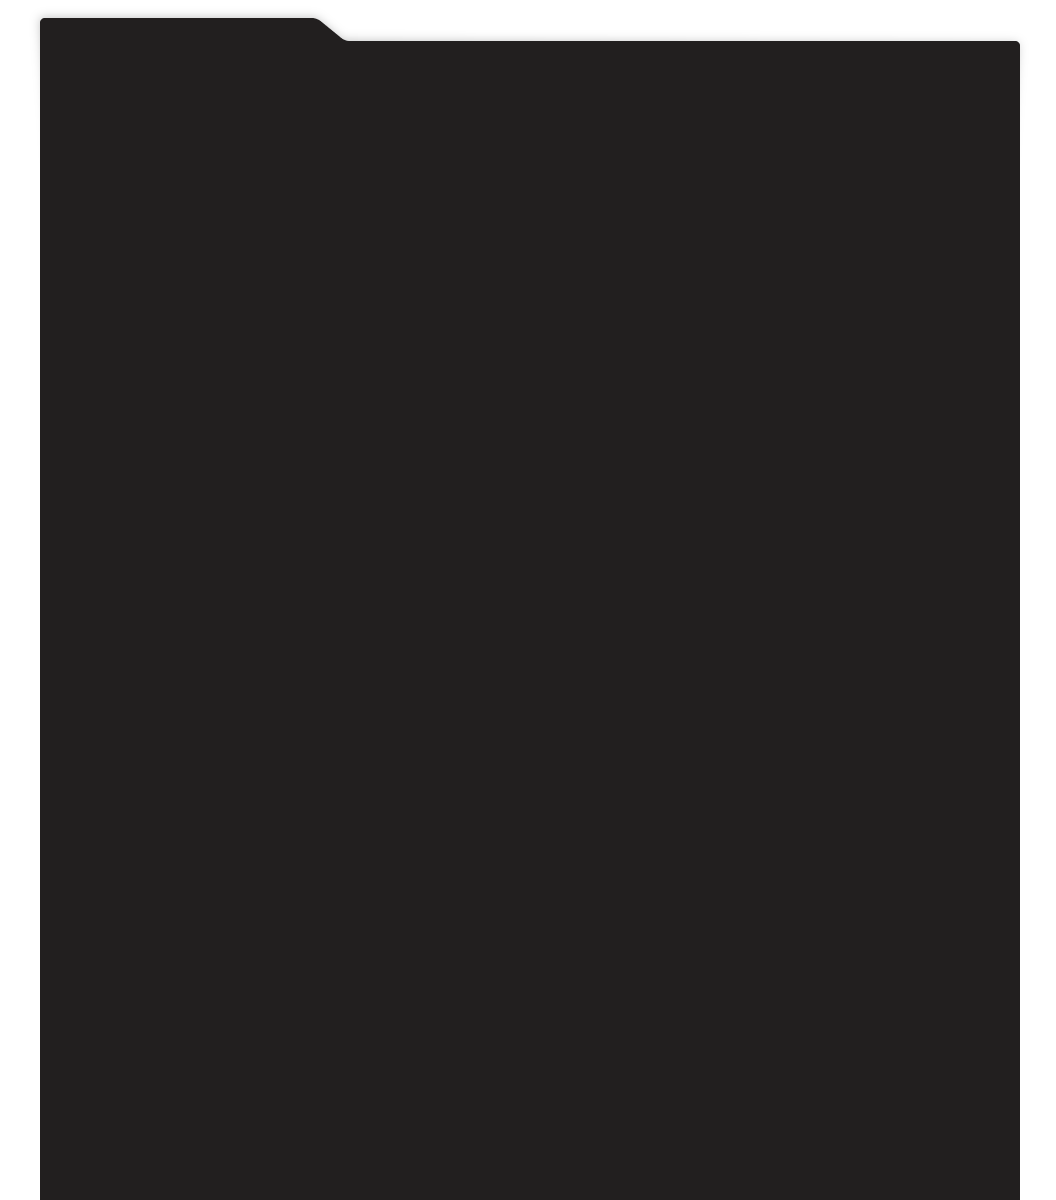
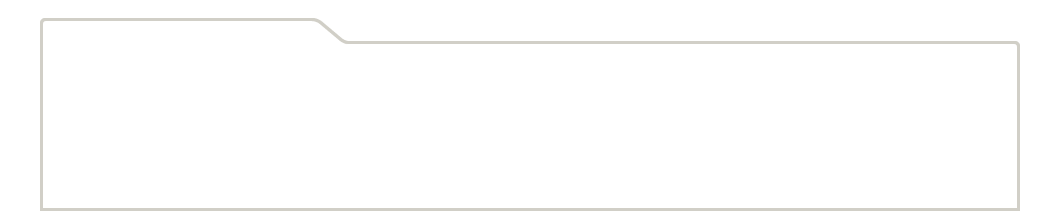
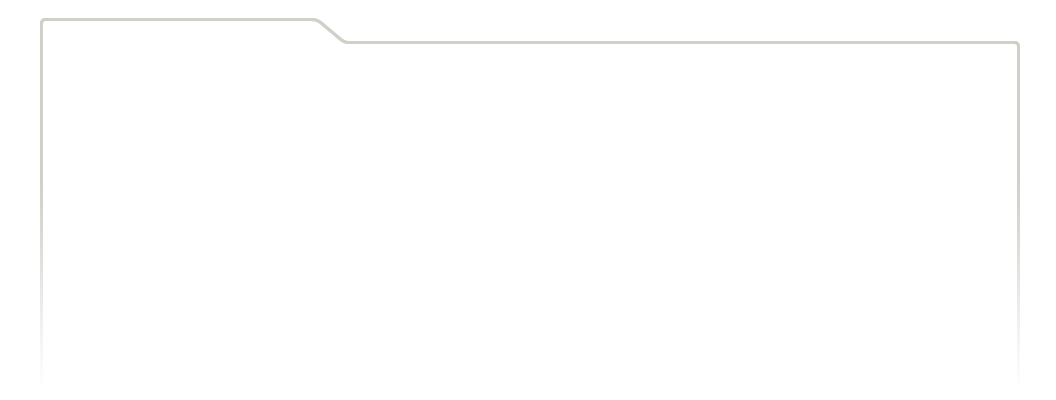
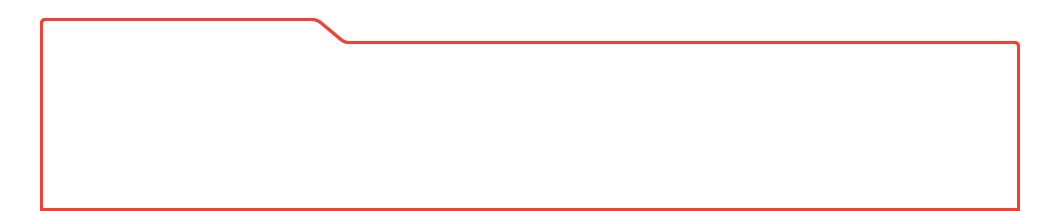
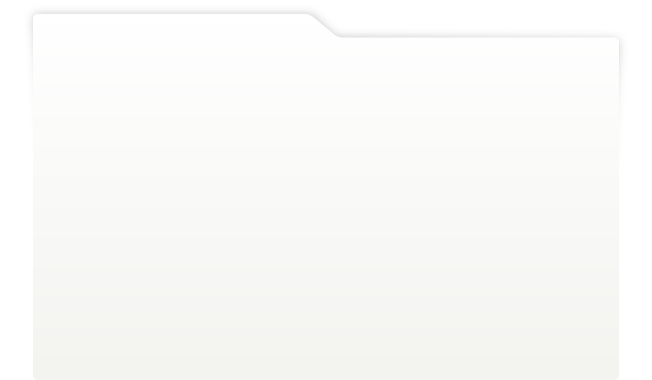
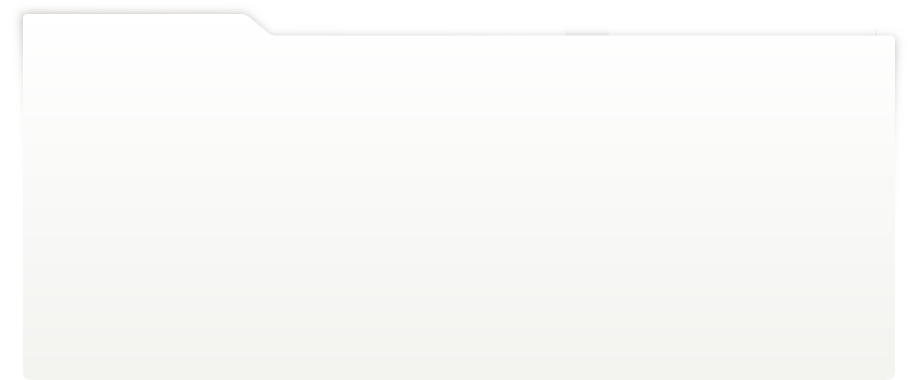
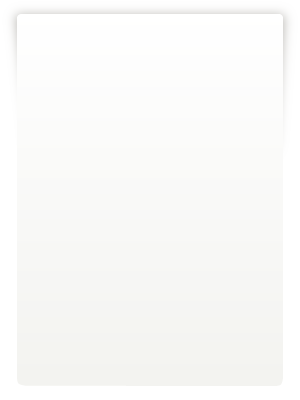
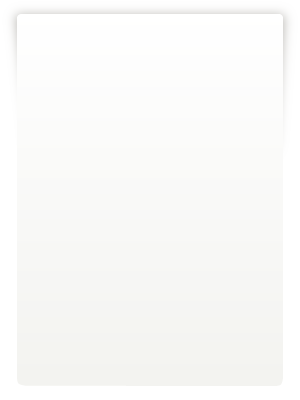
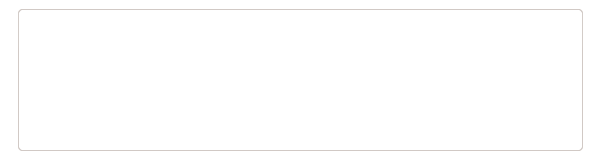
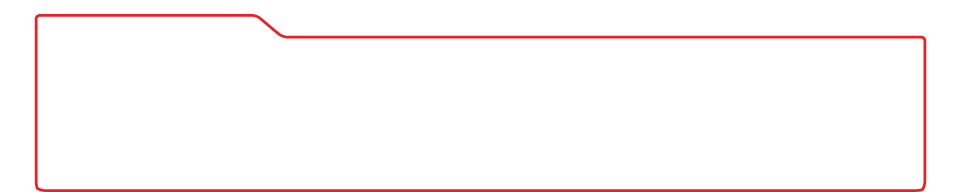
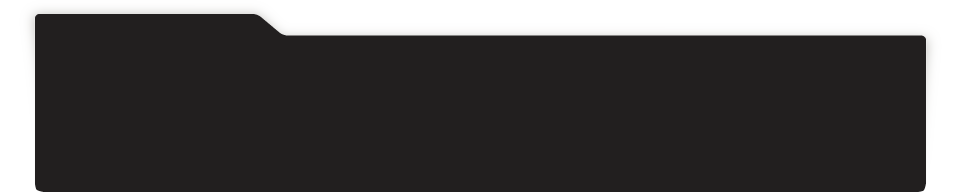
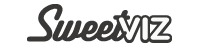
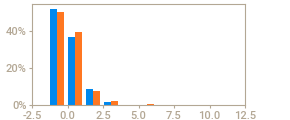
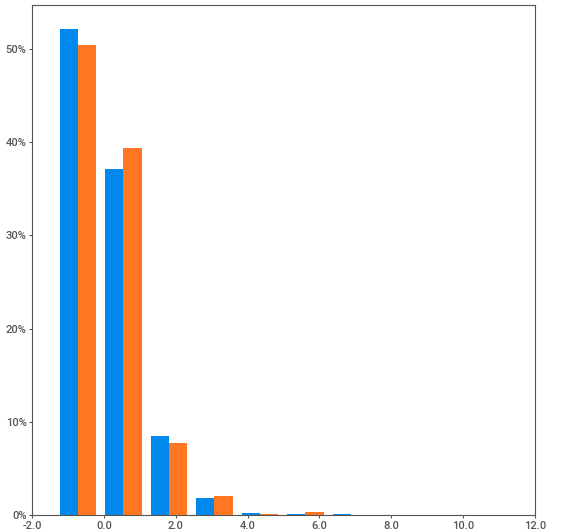
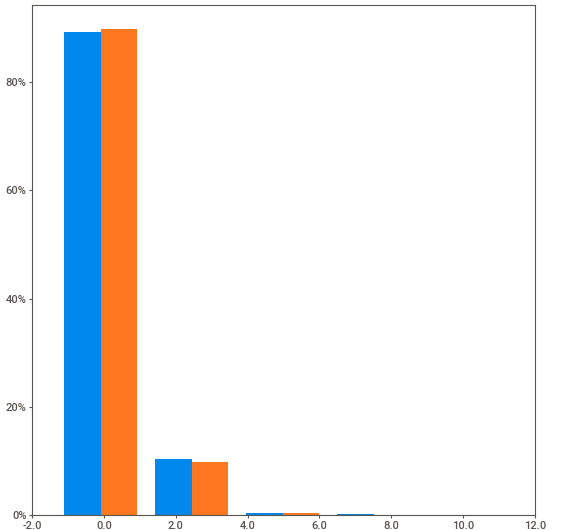
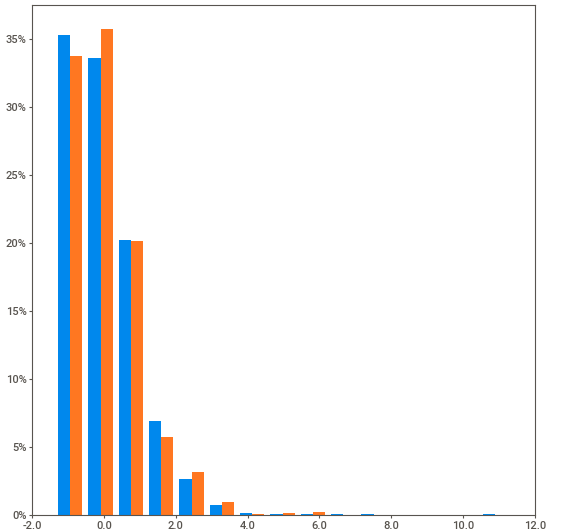
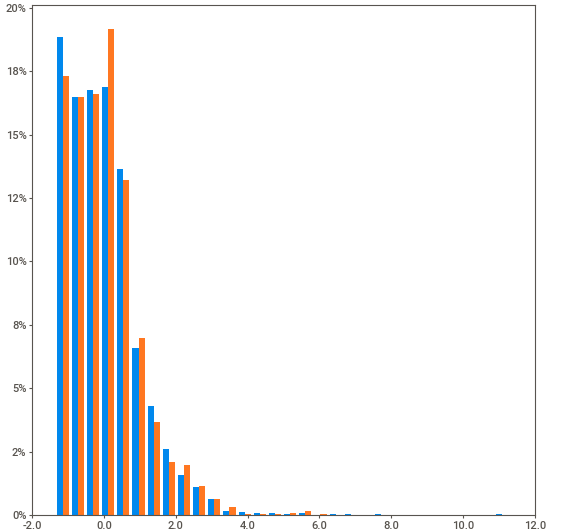
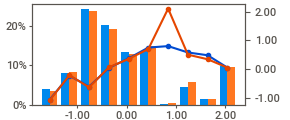
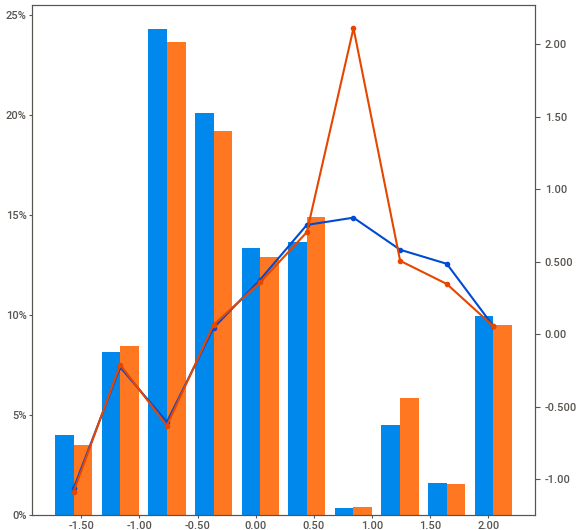
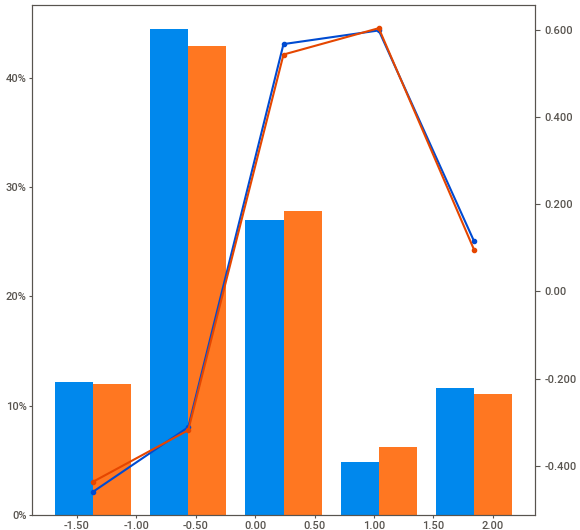
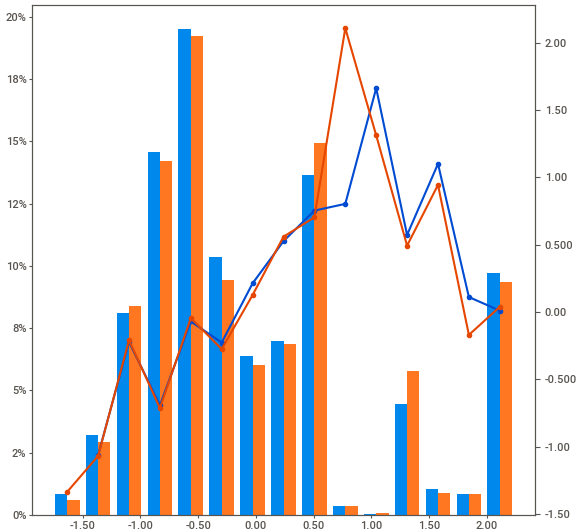
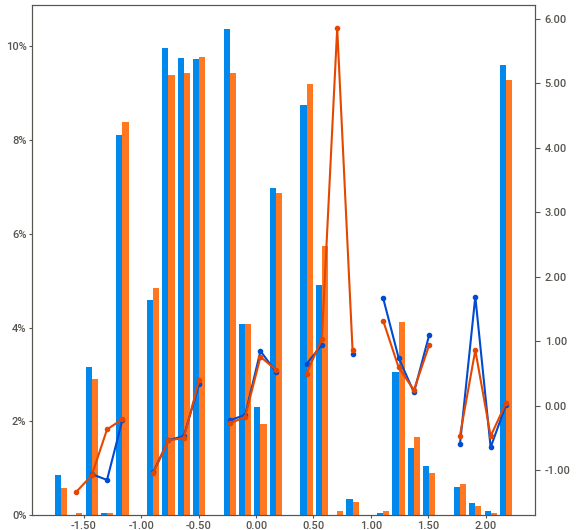
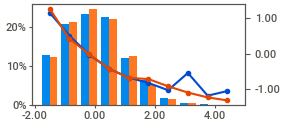
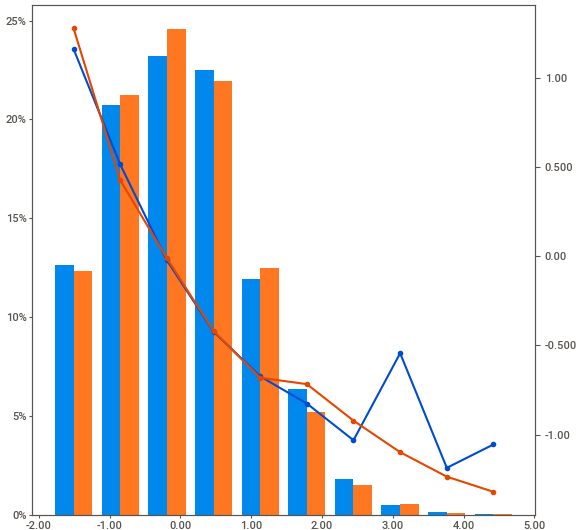
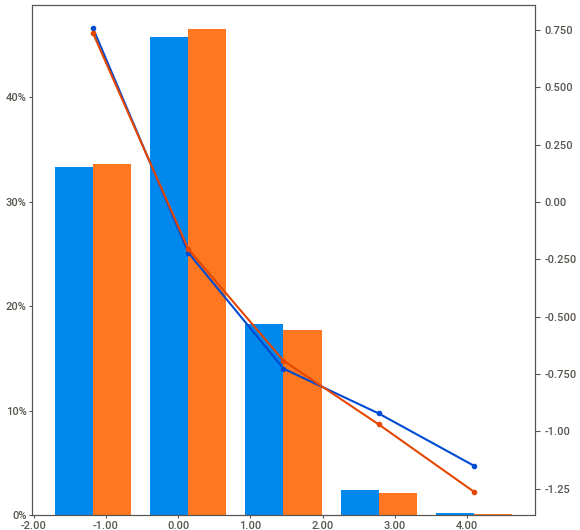
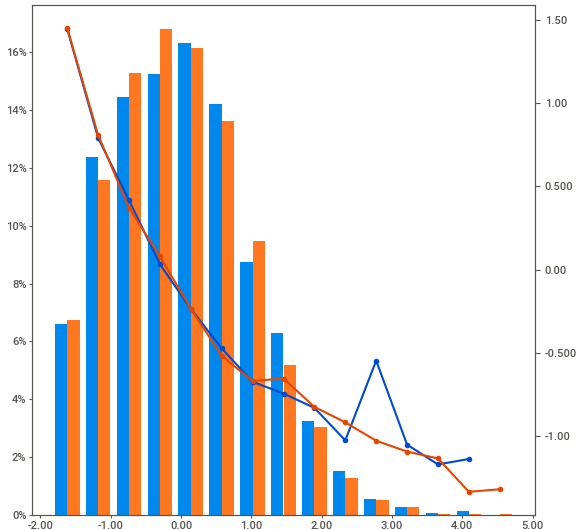
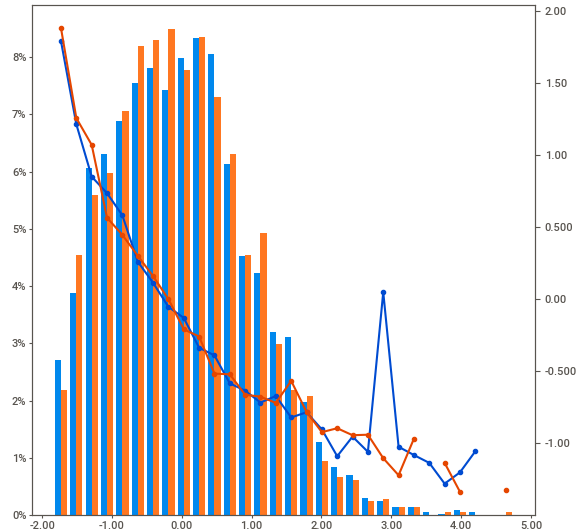
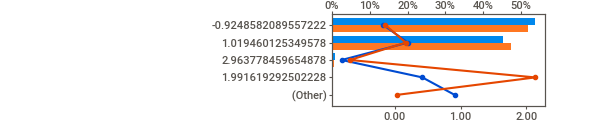
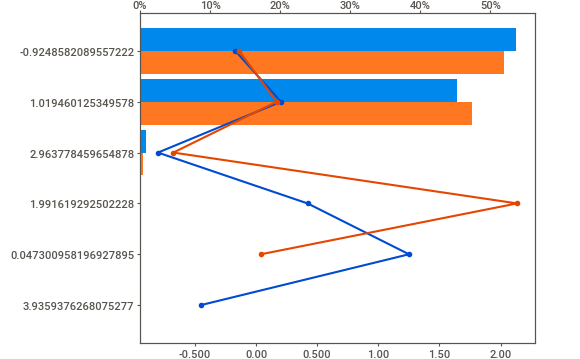
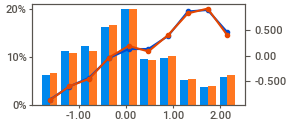
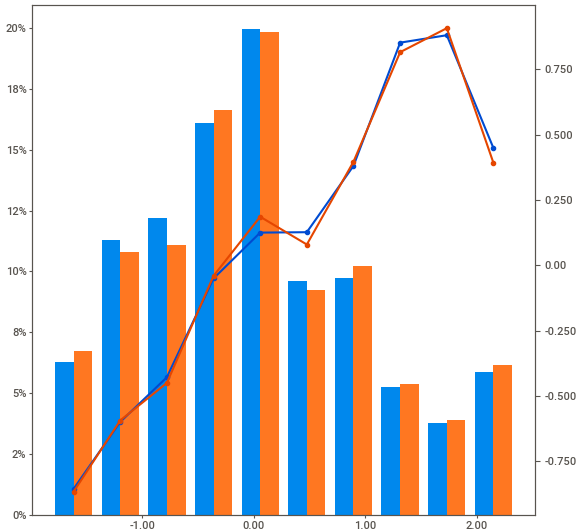
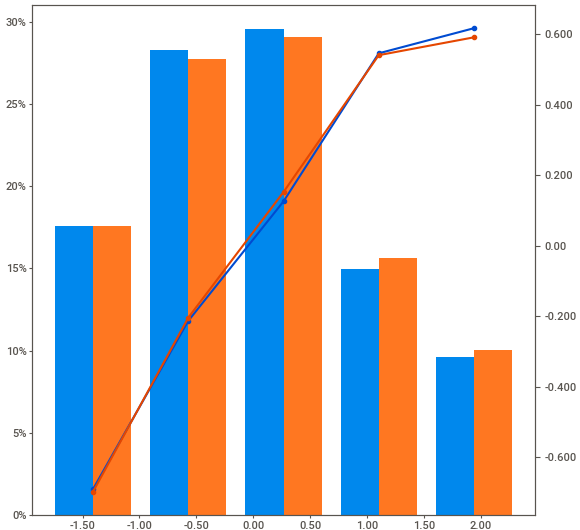
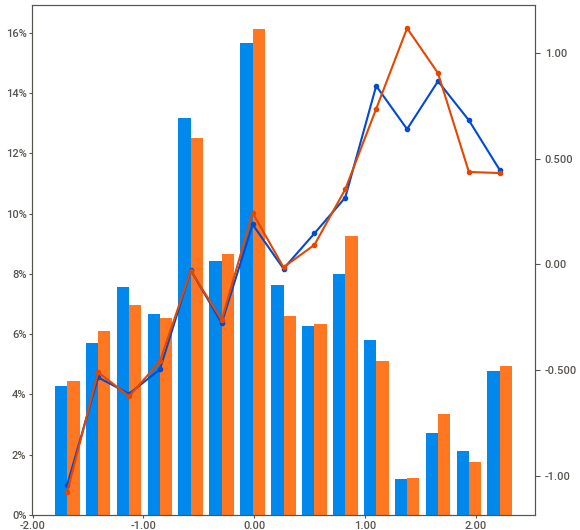
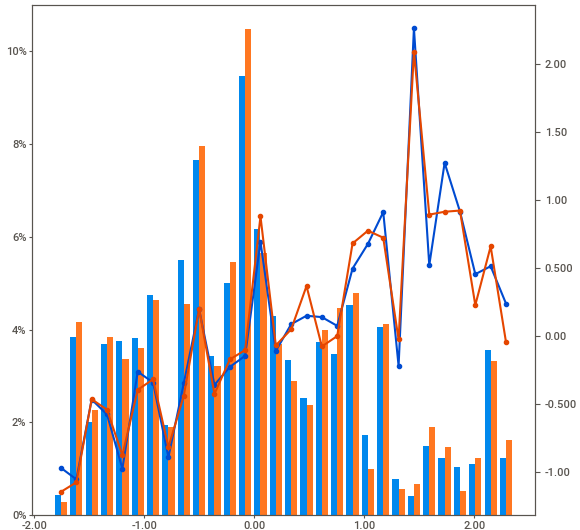
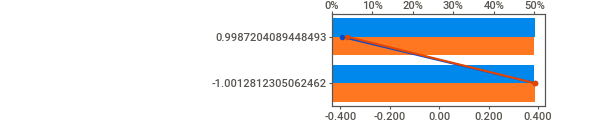
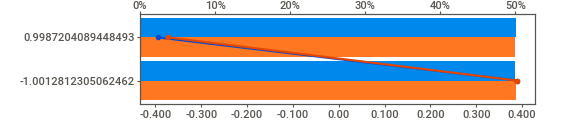
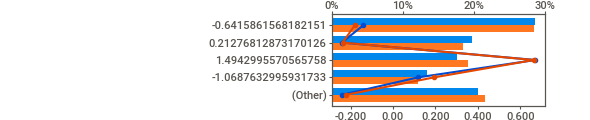
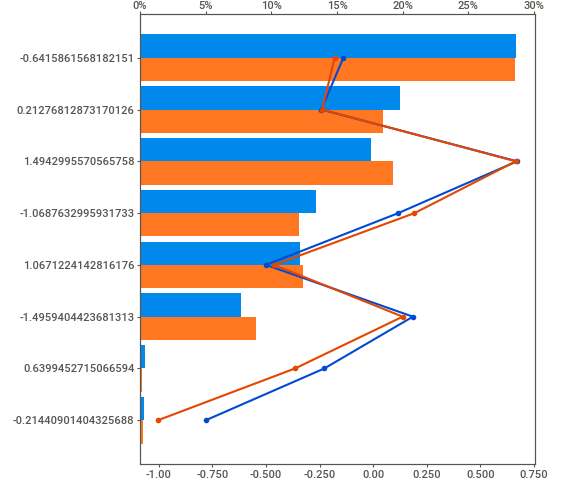
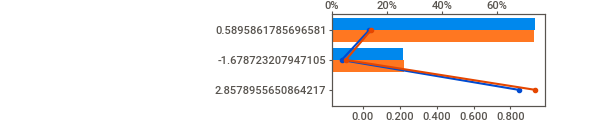
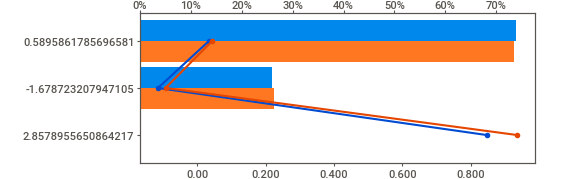
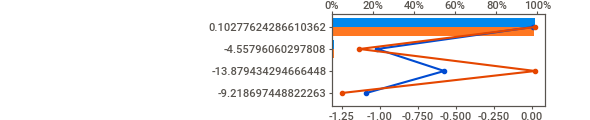
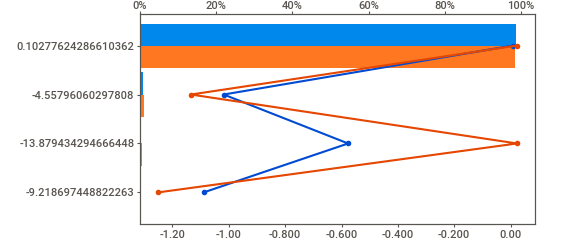
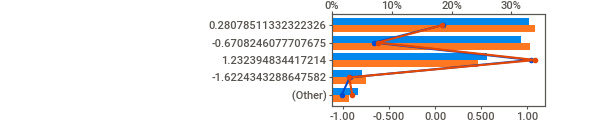
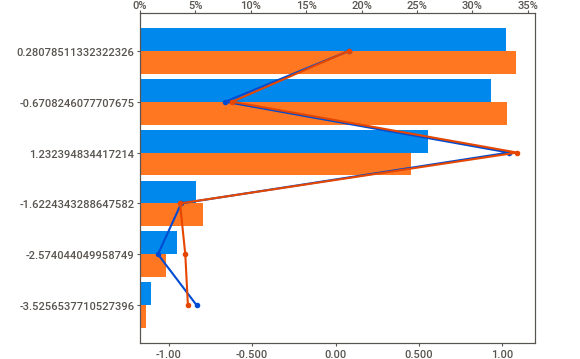
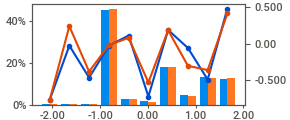
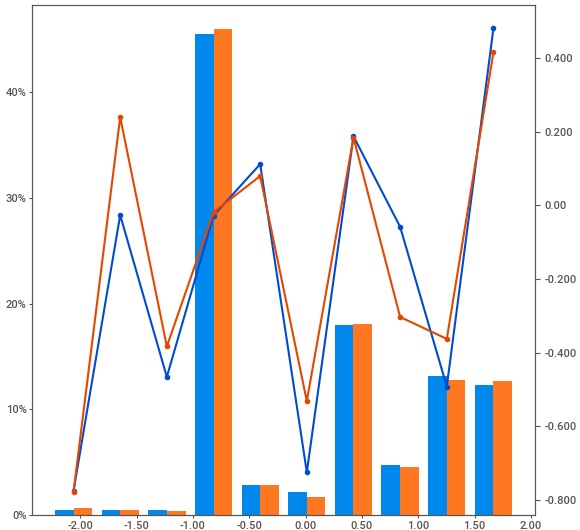
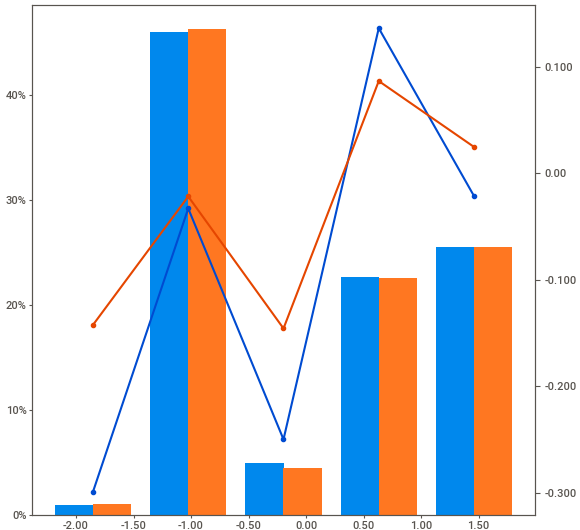
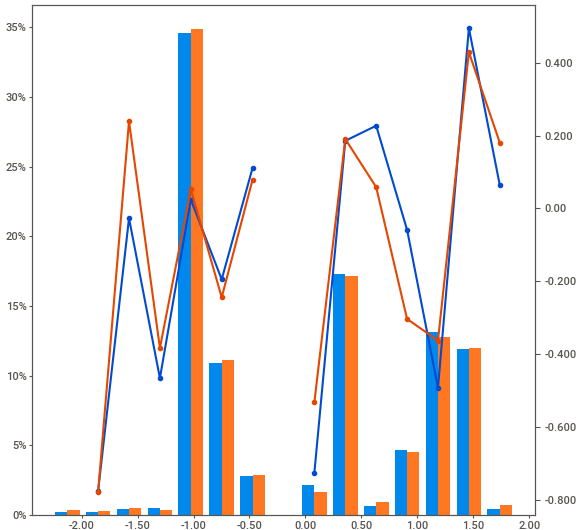
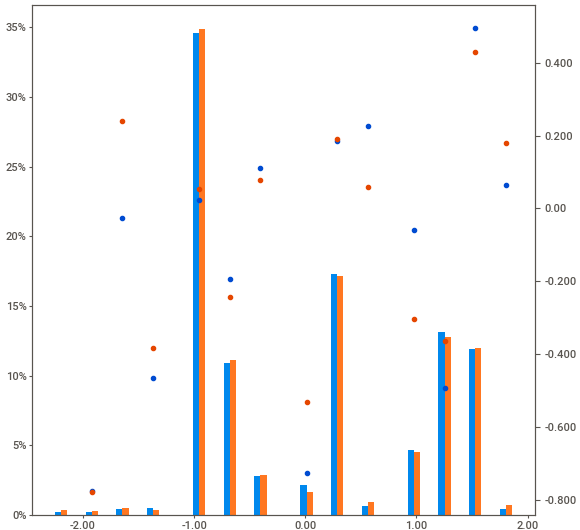
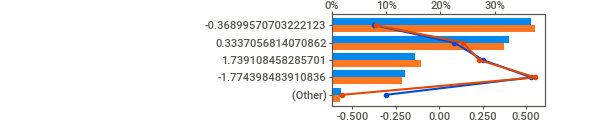
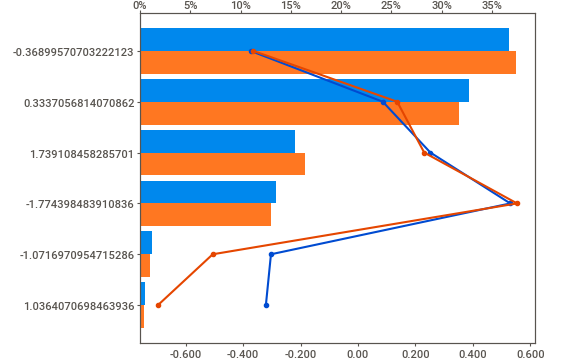
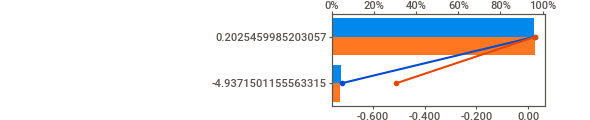
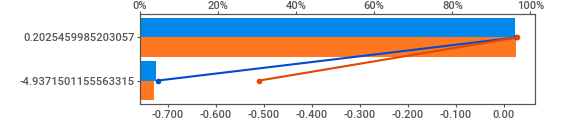
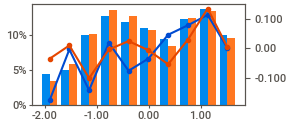
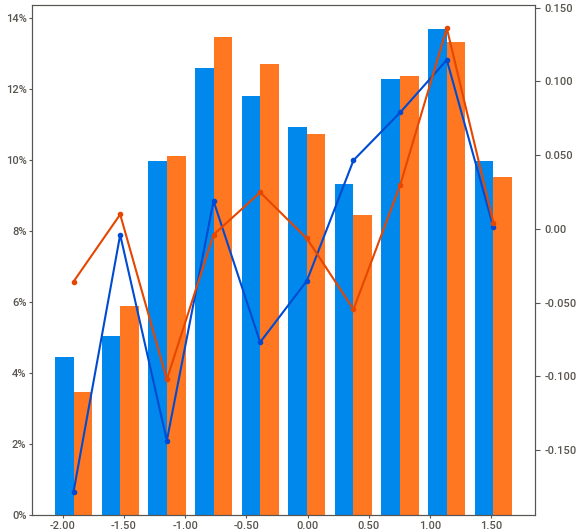
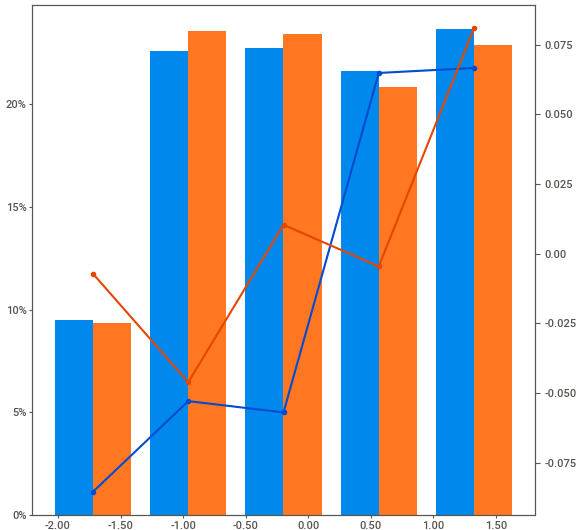
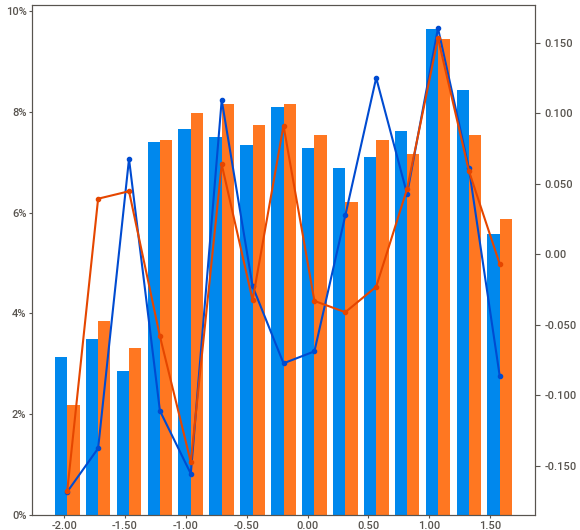
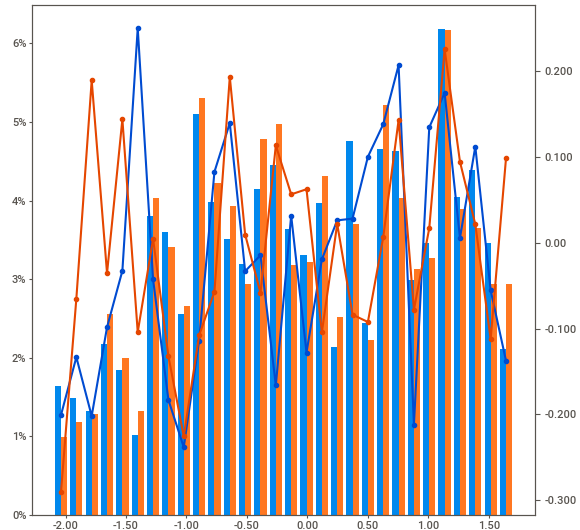
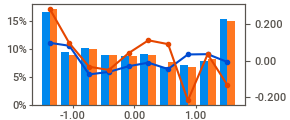
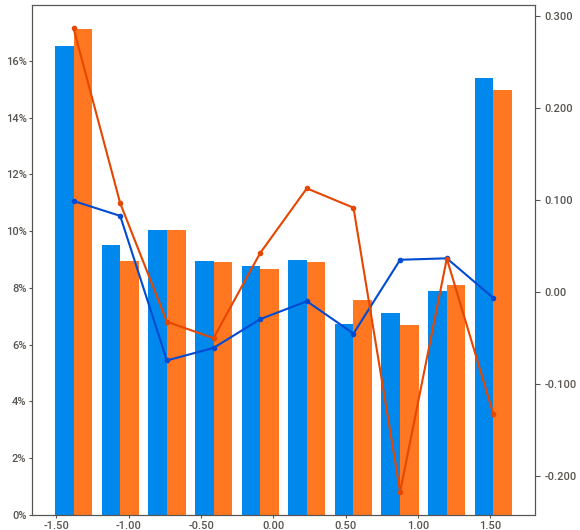
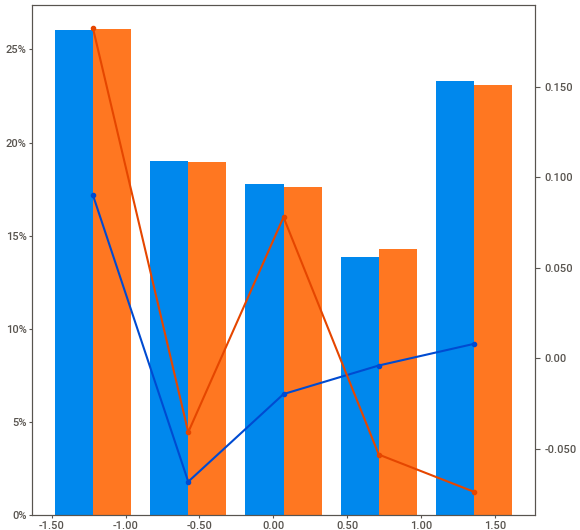
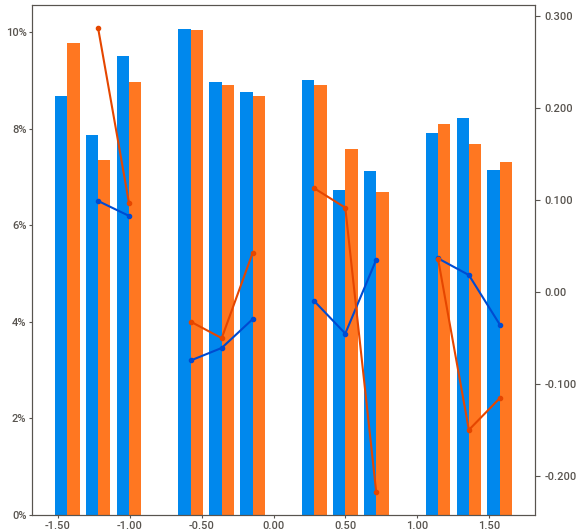
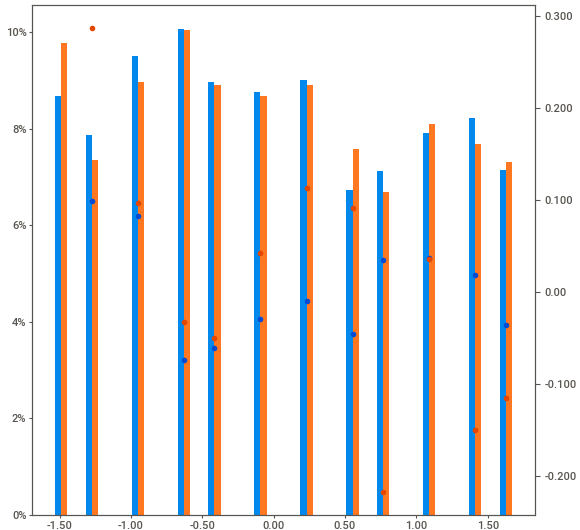
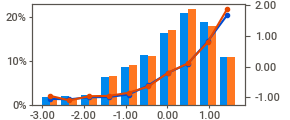
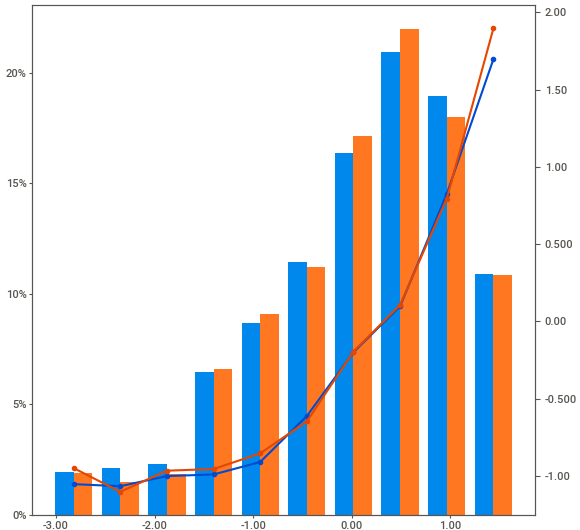
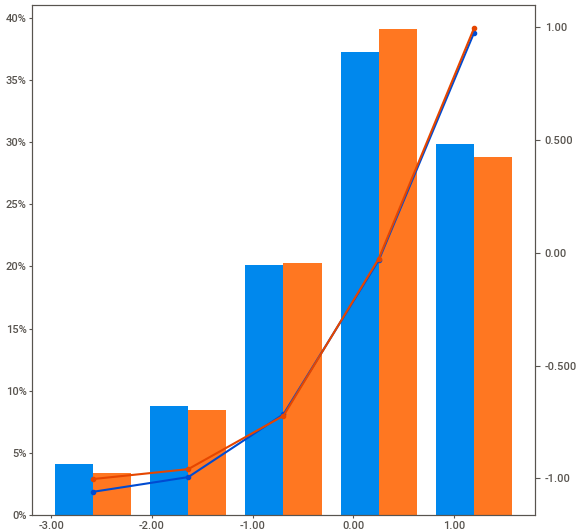
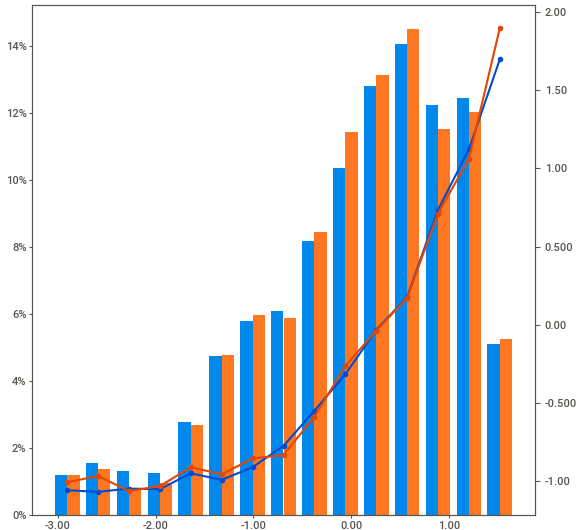
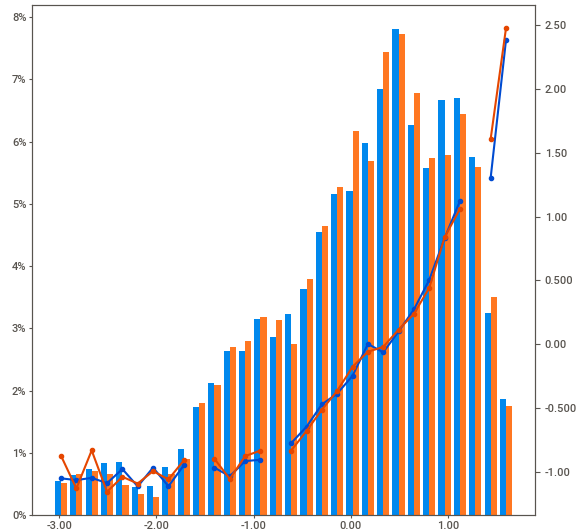
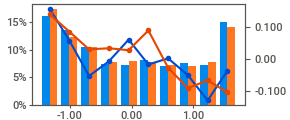
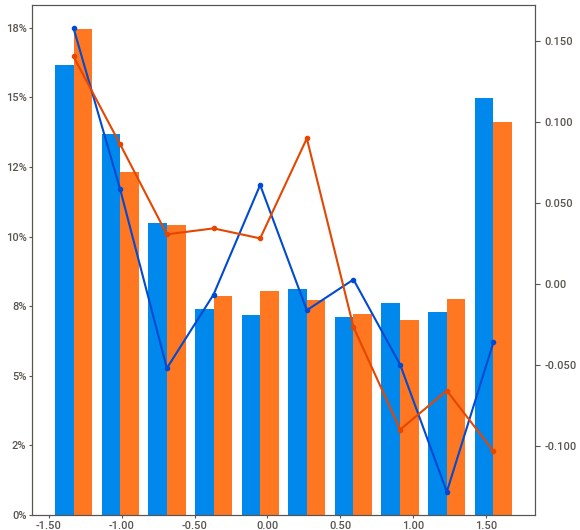
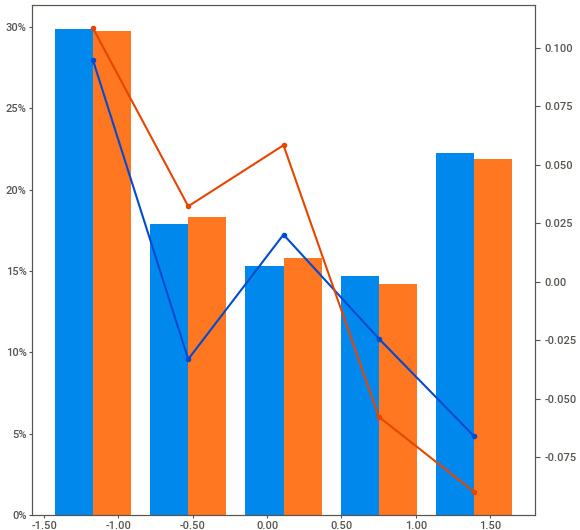
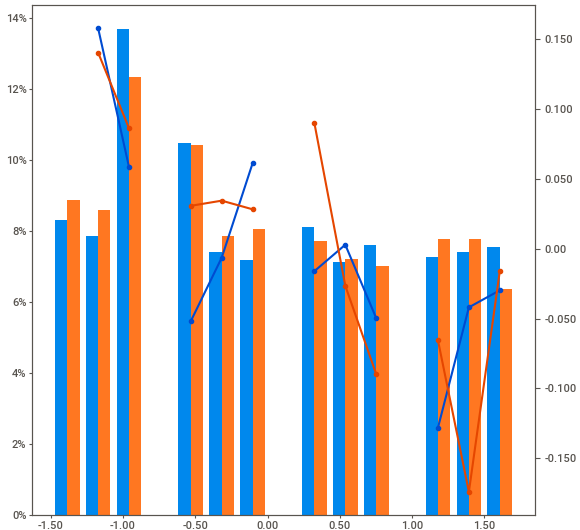
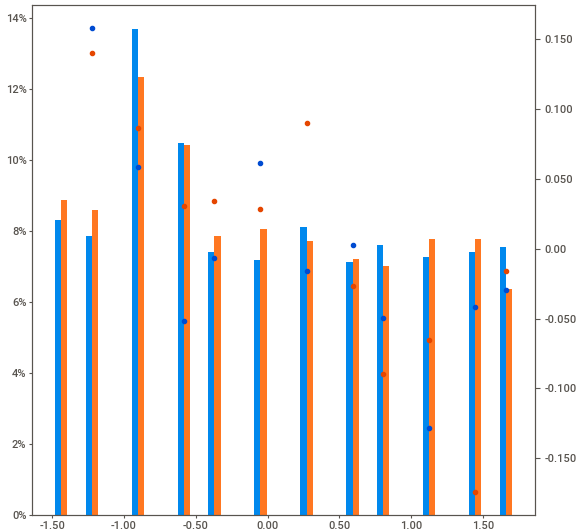
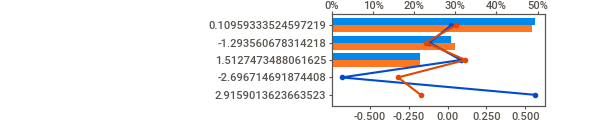
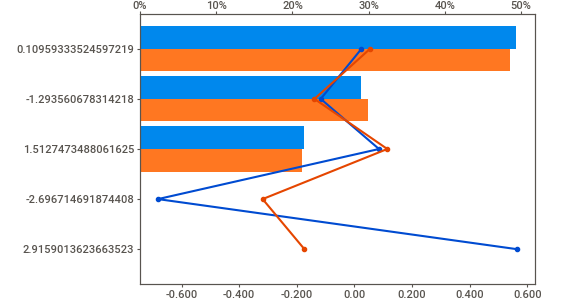
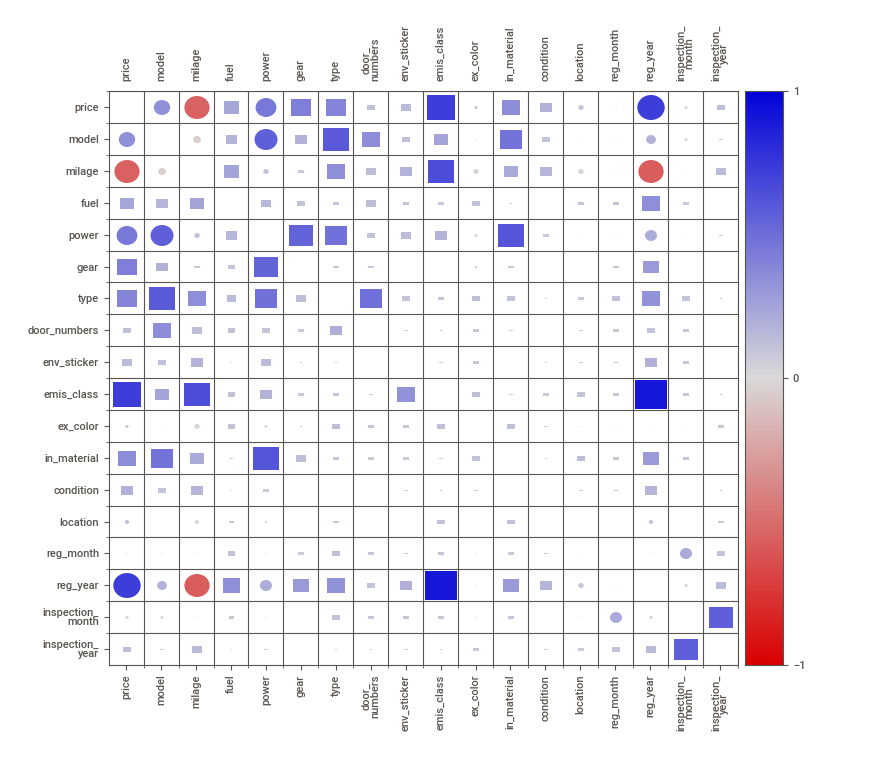
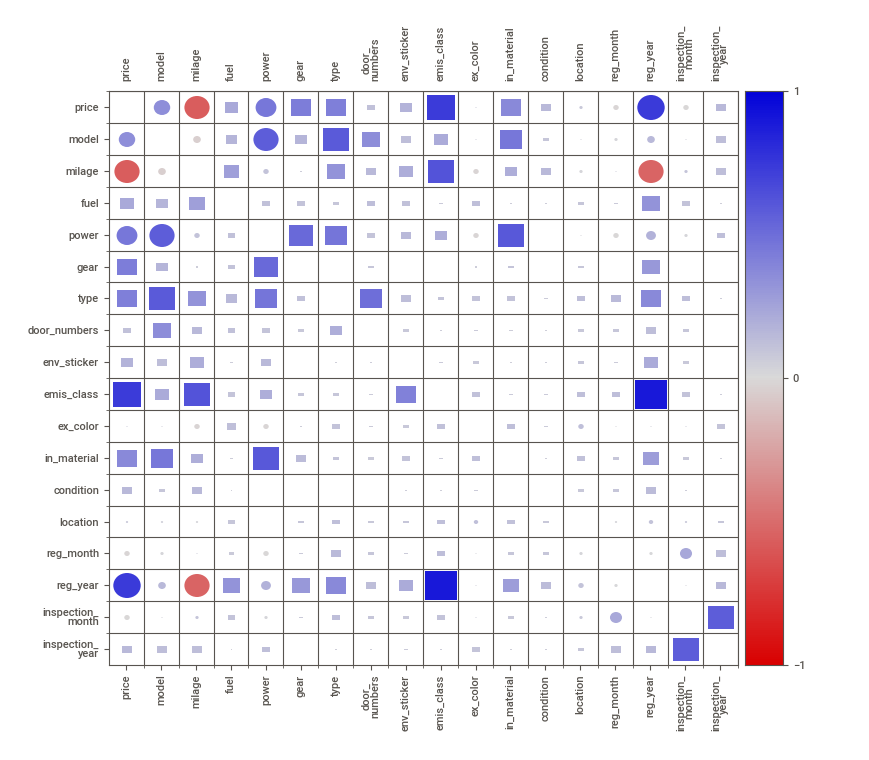

In [28]:
compare_report=sweetviz.compare(trainset,testset,target_feat="price")
compare_report.show_notebook()
#dağılımlar güzel

In [10]:
#ols model for statistical summary
import statsmodels.api as sm
ols = sm.OLS(y_train,X_train).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.703
Model:                            OLS   Adj. R-squared (uncentered):              0.701
Method:                 Least Squares   F-statistic:                              681.1
Date:                Sun, 27 Jun 2021   Prob (F-statistic):                        0.00
Time:                        20:19:16   Log-Likelihood:                         -4050.0
No. Observations:                4920   AIC:                                      8134.
Df Residuals:                    4903   BIC:                                      8244.
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
model                0.0778      0.010      7.542      0.000       0.058       0.098
milage              -0.4022      0.011    -35.000      0.000      -0.425      -0.380
fuel                 0.0838      0.010      8.777      0.000       0.065       0.102
power                0.3026      0.012     26.230      0.000       0.280       0.325
gear                -0.0895      0.010     -9.036      0.000      -0.109      -0.070
type                -0.0002      0.009     -0.020      0.984      -0.018       0.018
door_numbers         0.0588      0.010      6.075      0.000       0.040       0.078
env_sticker         -0.0371      0.008     -4.411      0.000      -0.054      -0.021
emis_class           0.1106      0.018      6.203      0.000       0.076       0.145
ex_color             0.0254      0.008      3.198      0.001       0.010       0.041
in_material         -0.0189      0.008     -2.389      0.017      -0.034      -0.003
condition            0.0379      0.008      4.815      0.000       0.022       0.053
location             0.0130      0.008      1.644      0.100      -0.002       0.028
reg_month           -0.0047      0.008     -0.583      0.560      -0.020       0.011
reg_year             0.2575      0.020     13.093      0.000       0.219       0.296
inspection_month    -0.0102      0.009     -1.088      0.277      -0.028       0.008
inspection_year  -2.027e-05      0.009     -0.002      0.998      -0.018       0.018
==============================================================================
Omnibus:                     5890.004   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2108552.604
Skew:                           5.912   Prob(JB):                         0.00
Kurtosis:                     103.726   Cond. No.                         5.39
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
accu=pd.DataFrame(index=['RMSE'])

In [12]:
def compML(alg):

    try:
        model = alg(n_jobs=-1).fit(X_train,y_train)
    except:
        model = alg().fit(X_train,y_train)
    #hummingbird implementation
    #model = convert(model, 'pytorch')
    #model=model.to('cuda')
    y_pred = model.predict(X_test)
    RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
    model_name = alg.__name__
    print(model_name,'Test-set Error (RMSE):', RMSE)
    accu.insert(0, model_name,RMSE)

In [14]:
models = [LinearRegression,
          LassoCV,RidgeCV,
          LGBMRegressor,
          XGBRegressor,
          GradientBoostingRegressor,
          RandomForestRegressor,
          DecisionTreeRegressor,
          MLPRegressor,
          KNeighborsRegressor,
          CatBoostRegressor,
          BaggingRegressor,
          TheilSenRegressor,
          AdaBoostRegressor,
          ElasticNet,
          ExtraTreesRegressor
          ]

In [15]:
for i in models:
    compML(i)

LinearRegression Test-set Error (RMSE): 0.4946624623527591
LassoCV Test-set Error (RMSE): 0.4946836342785468
RidgeCV Test-set Error (RMSE): 0.4946974679398464
LGBMRegressor Test-set Error (RMSE): 0.25293309559158594
XGBRegressor Test-set Error (RMSE): 0.26972836442329895
GradientBoostingRegressor Test-set Error (RMSE): 0.25776046842605904
RandomForestRegressor Test-set Error (RMSE): 0.2720037110701679
DecisionTreeRegressor Test-set Error (RMSE): 0.5185187938680593
MLPRegressor Test-set Error (RMSE): 0.3325396010172202
KNeighborsRegressor Test-set Error (RMSE): 0.4891617995711729
Learning rate set to 0.051829
0:	learn: 0.9750386	total: 151ms	remaining: 2m 31s
1:	learn: 0.9413744	total: 155ms	remaining: 1m 17s
2:	learn: 0.9101457	total: 158ms	remaining: 52.6s
3:	learn: 0.8803234	total: 161ms	remaining: 40.1s
4:	learn: 0.8517982	total: 164ms	remaining: 32.7s
5:	learn: 0.8249353	total: 167ms	remaining: 27.7s
6:	learn: 0.7985773	total: 170ms	remaining: 24.1s
7:	learn: 0.7734681	total: 173ms

<AxesSubplot:>

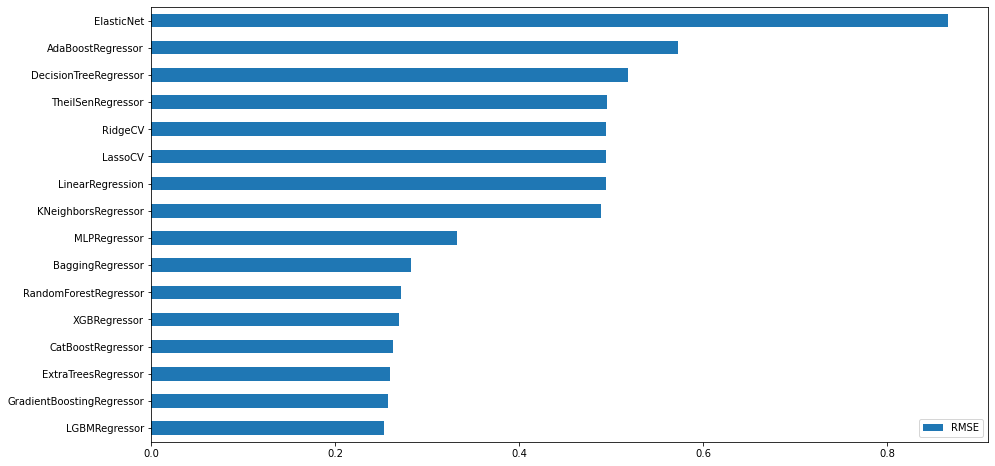

In [16]:
accu.T.sort_values(by="RMSE").plot(kind="barh",figsize=(15,8))

In [17]:
accu.T.sort_values(by="RMSE")

RMSE
LGBMRegressor              0.252933
GradientBoostingRegressor  0.257760
ExtraTreesRegressor        0.259206
CatBoostRegressor          0.263209
XGBRegressor               0.269728
RandomForestRegressor      0.272004
BaggingRegressor           0.282050
MLPRegressor               0.332540
KNeighborsRegressor        0.489162
LinearRegression           0.494662
LassoCV                    0.494684
RidgeCV                    0.494697
TheilSenRegressor          0.495737
DecisionTreeRegressor      0.518519
AdaBoostRegressor          0.572382
ElasticNet                 0.866079

In [33]:
params = {"n_estimators" : [10, 50, 100, 500, 1000, 5000],
          "learning_rate" : [0.0001, 0.001, 0.01, 0.1, 1.0],
          "boosting_type": ['gbdt', 'dart', 'goss'],
          #"max_depth":range(1,11),
          #"num_leaves":range(2,21,2)

}

lgb_model=GridSearchCV(LGBMRegressor(),params,cv=10,n_jobs=-1,verbose=True).fit(X_train,y_train)

Fitting 10 folds for each of 90 candidates, totalling 900 fits


In [34]:
lgb_model.best_params_

{'boosting_type': 'gbdt', 'learning_rate': 0.01, 'n_estimators': 1000}

In [35]:
lgb_tuned=LGBMRegressor(**lgb_model.best_params_,n_jobs=-1).fit(X_train,y_train)
y_pred = lgb_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

0.2497157463070388

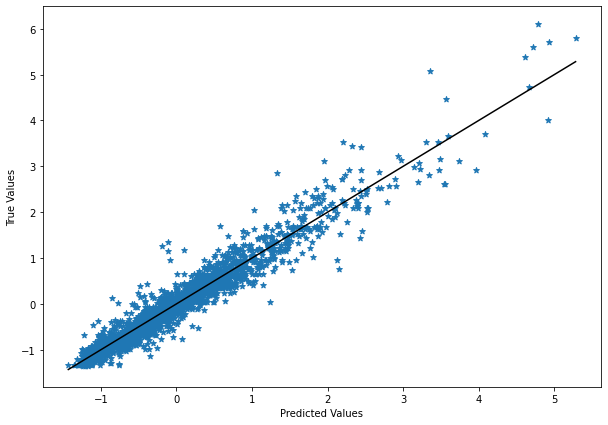

In [37]:
plt.figure(figsize=(10,7))
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.scatter(y_pred,y_test,marker='*')
plt.plot([y_pred.min(),y_pred.max()],[y_pred.min(),y_pred.max()], color='k')
plt.show()